**Objective**

* Perform 'Exploratory Data Analysis' on dataset 'Global Terroism'.  



# **Importing all Libraries for Analysis**

In [2]:
# Importing Library
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# **Importing and Observing Dataset**

In [25]:
data=pd.read_csv("/content/globalterrorismdb_0718dist.csv", encoding="latin1")
df=pd.DataFrame(data)
print("Data has been successfully imported")
df.head()

Data has been successfully imported


<ipython-input-25-1a7ce99941f8>:1: DtypeWarning: Columns (4,31,33,76,94,96,114,121) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv("/content/globalterrorismdb_0718dist.csv", encoding="latin1")


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16581 entries, 0 to 16580
Columns: 135 entries, eventid to related
dtypes: float64(63), int64(18), object(54)
memory usage: 17.1+ MB


In [27]:
df.shape

(16581, 135)

In [28]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [29]:
for i in df.columns:
    print(i,end=", ")

eventid, iyear, imonth, iday, approxdate, extended, resolution, country, country_txt, region, region_txt, provstate, city, latitude, longitude, specificity, vicinity, location, summary, crit1, crit2, crit3, doubtterr, alternative, alternative_txt, multiple, success, suicide, attacktype1, attacktype1_txt, attacktype2, attacktype2_txt, attacktype3, attacktype3_txt, targtype1, targtype1_txt, targsubtype1, targsubtype1_txt, corp1, target1, natlty1, natlty1_txt, targtype2, targtype2_txt, targsubtype2, targsubtype2_txt, corp2, target2, natlty2, natlty2_txt, targtype3, targtype3_txt, targsubtype3, targsubtype3_txt, corp3, target3, natlty3, natlty3_txt, gname, gsubname, gname2, gsubname2, gname3, gsubname3, motive, guncertain1, guncertain2, guncertain3, individual, nperps, nperpcap, claimed, claimmode, claimmode_txt, claim2, claimmode2, claimmode2_txt, claim3, claimmode3, claimmode3_txt, compclaim, weaptype1, weaptype1_txt, weapsubtype1, weapsubtype1_txt, weaptype2, weaptype2_txt, weapsubtype2

# **Cleaning the Data**

In [30]:
df=df[["iyear","imonth","iday","country_txt","region_txt","provstate","city",
       "latitude","longitude","location","summary","attacktype1_txt","targtype1_txt",
       "gname","motive","weaptype1_txt","nkill","nwound","addnotes"]]
df.head()


,iyear,imonth,iday,country_txt,region_txt,provstate,city,latitude,longitude,location,summary,attacktype1_txt,targtype1_txt,gname,motive,weaptype1_txt,nkill,nwound,addnotes
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,NaN,NaN,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,0.0,NaN
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,NaN,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,0.0,NaN
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,NaN,NaN,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,0.0,NaN
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,NaN,NaN,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,NaN,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,NaN,NaN,NaN


In [31]:
df.rename(columns={"iyear":"Year","imonth":"Month","iday":"Day","country_txt":"Country",
                   "region_txt":"Region","provstate":"Province/State","city":"City",
                   "latitude":"Latitude","longitude":"Longitude","location":"Location",
                   "summary":"Summary","attacktype1_txt":"Attack Type","targtype1_txt":"Target Type",
                   "gname":"Group Name","motive":"Motive","weaptype1_txt":"Weapon Type",
                   "nkill":"Killed","nwound":"Wounded","addnotes":"Add Notes"},inplace=True)

In [32]:
df.head()

,Year,Month,Day,Country,Region,Province/State,City,Latitude,Longitude,Location,Summary,Attack Type,Target Type,Group Name,Motive,Weapon Type,Killed,Wounded,Add Notes
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,NaN,NaN,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,0.0,NaN
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,NaN,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,0.0,NaN
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,NaN,NaN,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,0.0,NaN
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,NaN,NaN,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,NaN,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,NaN,NaN,NaN


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16581 entries, 0 to 16580
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            16581 non-null  int64  
 1   Month           16581 non-null  int64  
 2   Day             16581 non-null  int64  
 3   Country         16581 non-null  object 
 4   Region          16581 non-null  object 
 5   Province/State  16508 non-null  object 
 6   City            16581 non-null  object 
 7   Latitude        15975 non-null  float64
 8   Longitude       15975 non-null  float64
 9   Location        595 non-null    object 
 10  Summary         935 non-null    object 
 11  Attack Type     16581 non-null  object 
 12  Target Type     16581 non-null  object 
 13  Group Name      16580 non-null  object 
 14  Motive          668 non-null    object 
 15  Weapon Type     16580 non-null  object 
 16  Killed          13830 non-null  float64
 17  Wounded         12406 non-null 

In [34]:
df.shape

(16581, 19)

In [35]:
df.isnull().sum()

Year                  0
Month                 0
Day                   0
Country               0
Region                0
Province/State       73
City                  0
Latitude            606
Longitude           606
Location          15986
Summary           15646
Attack Type           0
Target Type           0
Group Name            1
Motive            15913
Weapon Type           1
Killed             2751
Wounded            4175
Add Notes         15899
dtype: int64

In [36]:
df["Killed"]=df["Killed"].fillna(0)
df["Wounded"]=df["Wounded"].fillna(0)
df["Casualty"]=df["Killed"]+df["Wounded"]

In [37]:
df.describe()

,Year,Month,Day,Latitude,Longitude,Killed,Wounded,Casualty
count,16581.000000,16581.000000,16581.000000,15975.000000,15975.000000,16581.000000,16581.000000,16581.000000
mean,1977.966045,6.201978,15.155962,27.875821,-28.932087,1.168024,0.982450,2.150473
std,3.270107,3.415697,8.949768,22.109249,55.936993,6.126776,6.981701,10.171567
min,1970.000000,0.000000,0.000000,-45.867889,-157.818968,0.000000,0.000000,0.000000
25%,1976.000000,3.000000,7.000000,13.692880,-86.600964,0.000000,0.000000,0.000000
50%,1979.000000,6.000000,15.000000,35.689125,-6.443767,0.000000,0.000000,0.000000
75%,1980.000000,9.000000,23.000000,43.291618,9.991586,1.000000,0.000000,1.000000
max,1986.000000,12.000000,31.000000,64.837778,172.636225,422.000000,300.000000,422.000000


**Observation**


1.   The data consists of terrorist activities ranging from the year 1970 to 1986.
2.   Maximum number of people killed in an event were: 422.
3.   Maximum number of people wounded in an event were: 300.
4.   Maximum number of total casualties in an event were: 422.



# **Visualizing the data**

1.   Year wise Attacks

*   Number of Attacks in each year





In [38]:
attacks=df["Year"].value_counts(dropna=False).sort_index().to_frame().reset_index().rename(columns={"index":"Year","Year":"Attacks"}).set_index("Year")
attacks.head()


,Attacks
Year,
1970,651
1971,471
1972,568
1973,473
1974,581


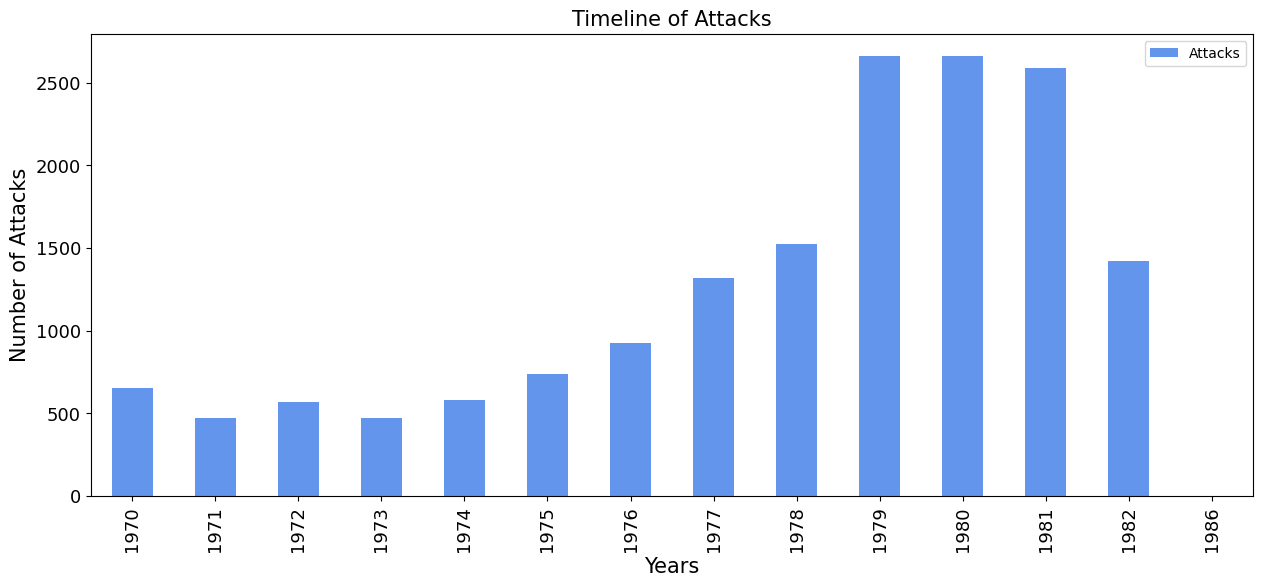

In [39]:
attacks.plot(kind="bar",color="cornflowerblue",figsize=(15,6),fontsize=13)
plt.title("Timeline of Attacks",fontsize=15)
plt.xlabel("Years",fontsize=15)
plt.ylabel("Number of Attacks",fontsize=15)
plt.show()



*   Most number of attacks(2500+) in 1979 and 1980.
*   Least number of attacks(471) in 1971.


  2.Total Casualties (Killed + Wounded) in each Year






In [40]:
yc=df[["Year","Casualty"]].groupby("Year").sum()
yc.head()

,Casualty
Year,
1970,386.0
1971,255.0
1972,975.0
1973,865.0
1974,1404.0


<function matplotlib.pyplot.show(close=None, block=None)>

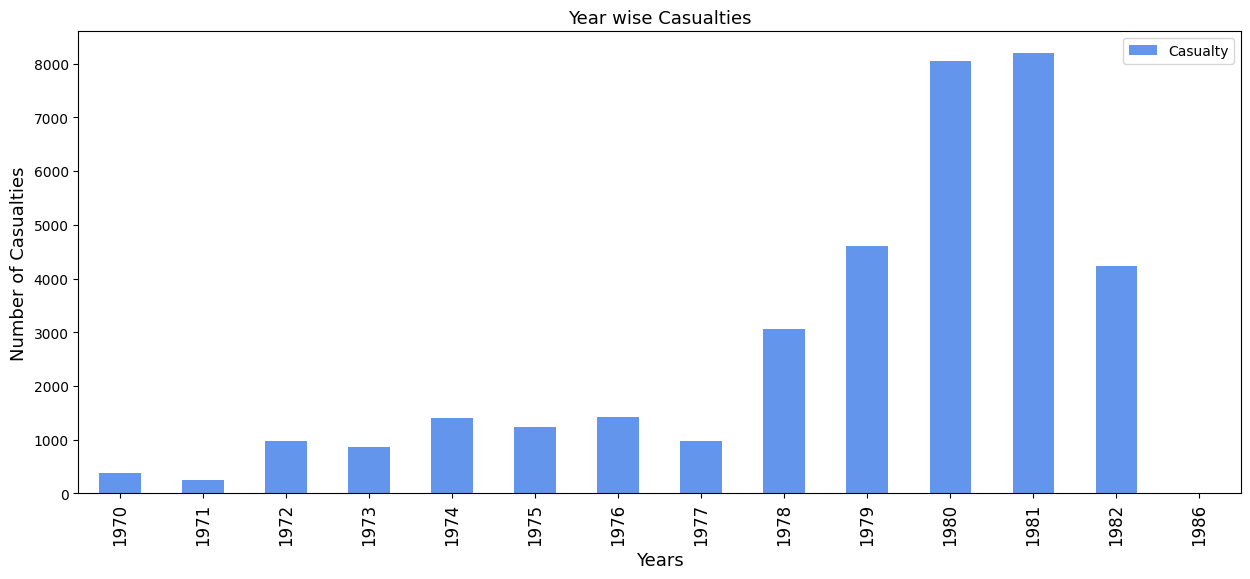

In [41]:
yc.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Year wise Casualties",fontsize=13)
plt.xlabel("Years",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualties",fontsize=13)
plt.show



3.   Killed in each year



In [42]:
yk=df[["Year","Killed"]].groupby("Year").sum()
yk.head()

,Killed
Year,
1970,174.0
1971,173.0
1972,566.0
1973,370.0
1974,539.0




4.   Wounded in each Region



In [43]:
yw=df[["Year","Wounded"]].groupby("Year").sum()
yw.head()

,Wounded
Year,
1970,212.0
1971,82.0
1972,409.0
1973,495.0
1974,865.0


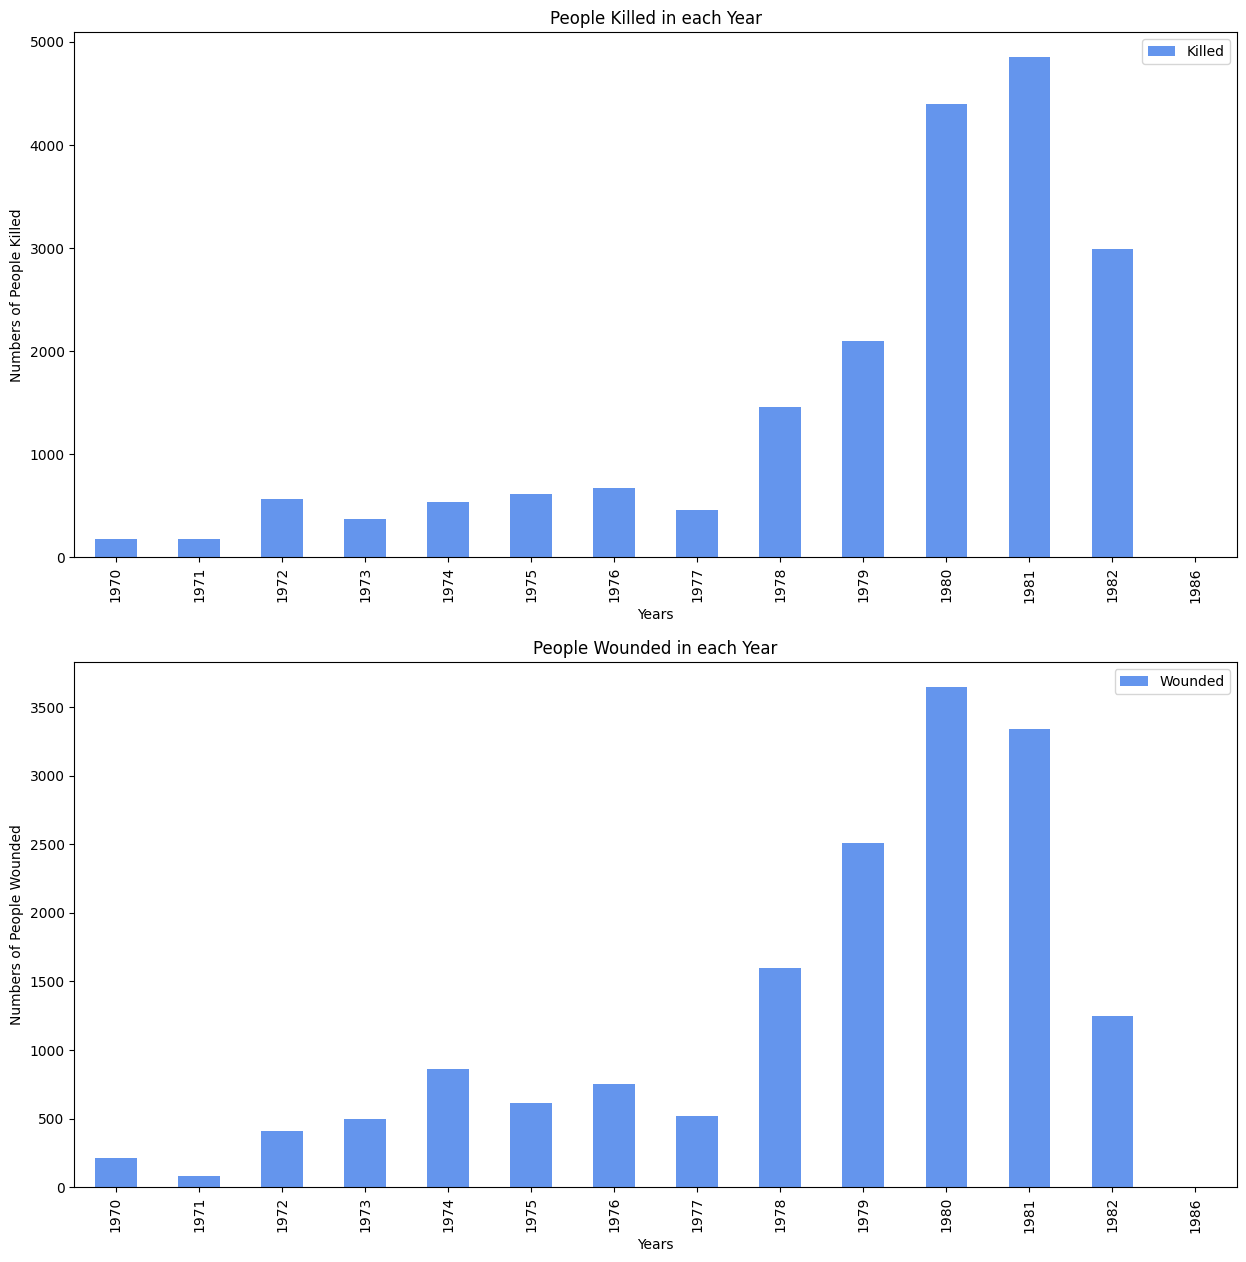

In [44]:
fig=plt.figure()
ax0=fig.add_subplot(2,1,1)
ax1=fig.add_subplot(2,1,2)

#Killed
yk.plot(kind="bar",color="cornflowerblue",figsize=(15,15),ax=ax0)
ax0.set_title("People Killed in each Year")
ax0.set_xlabel("Years")
ax0.set_ylabel("Numbers of People Killed")

#Wounded
yw.plot(kind="bar",color="cornflowerblue",figsize=(15,15),ax=ax1)
ax1.set_title("People Wounded in each Year")
ax1.set_xlabel("Years")
ax1.set_ylabel("Numbers of People Wounded")

plt.show()



**2.Region wise Attacks**


1.   Distribution of Terrorist Attacks over Regions from 1970-1986.



In [45]:
reg=pd.crosstab(df.Year,df.Region)
reg.head()

Region,Australasia & Oceania,Central America & Caribbean,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
Year,,,,,,,,,,,
1970,1,7,2,12,28,472,65,1,10,3,50
1971,1,5,1,5,55,247,24,0,6,2,125
1972,8,3,0,1,53,73,33,1,16,4,376
1973,1,6,2,1,19,64,83,1,2,4,290
1974,1,11,4,2,42,111,81,2,3,7,317


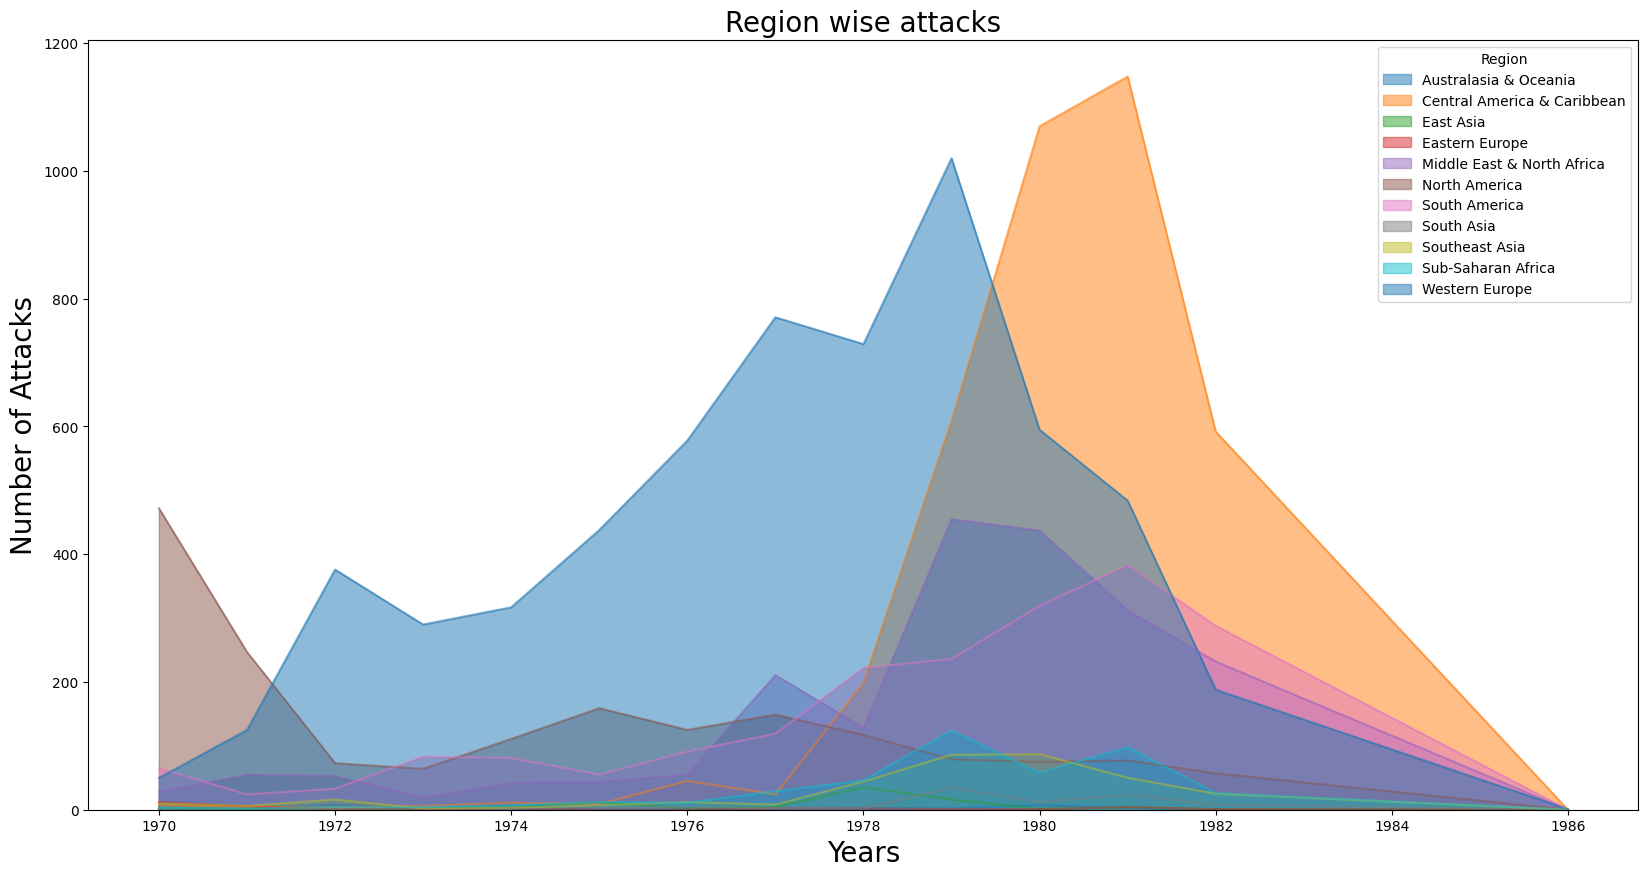

In [47]:
reg.plot(kind="area", stacked=False, alpha=0.5,figsize=(20,10))
plt.title("Region wise attacks",fontsize=20)
plt.xlabel("Years",fontsize=20)
plt.ylabel("Number of Attacks",fontsize=20)
plt.show()

2. Total Terrorist Attacks in each Region from 1970-1986.

In [48]:
regt=reg.transpose()
regt["Total"]=regt.sum(axis=1)
ra=regt["Total"].sort_values(ascending=False)
ra

Region
Western Europe                 5962
Central America & Caribbean    3728
Middle East & North Africa     2071
South America                  1999
North America                  1805
Sub-Saharan Africa              424
Southeast Asia                  356
South Asia                       94
East Asia                        84
Eastern Europe                   32
Australasia & Oceania            26
Name: Total, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

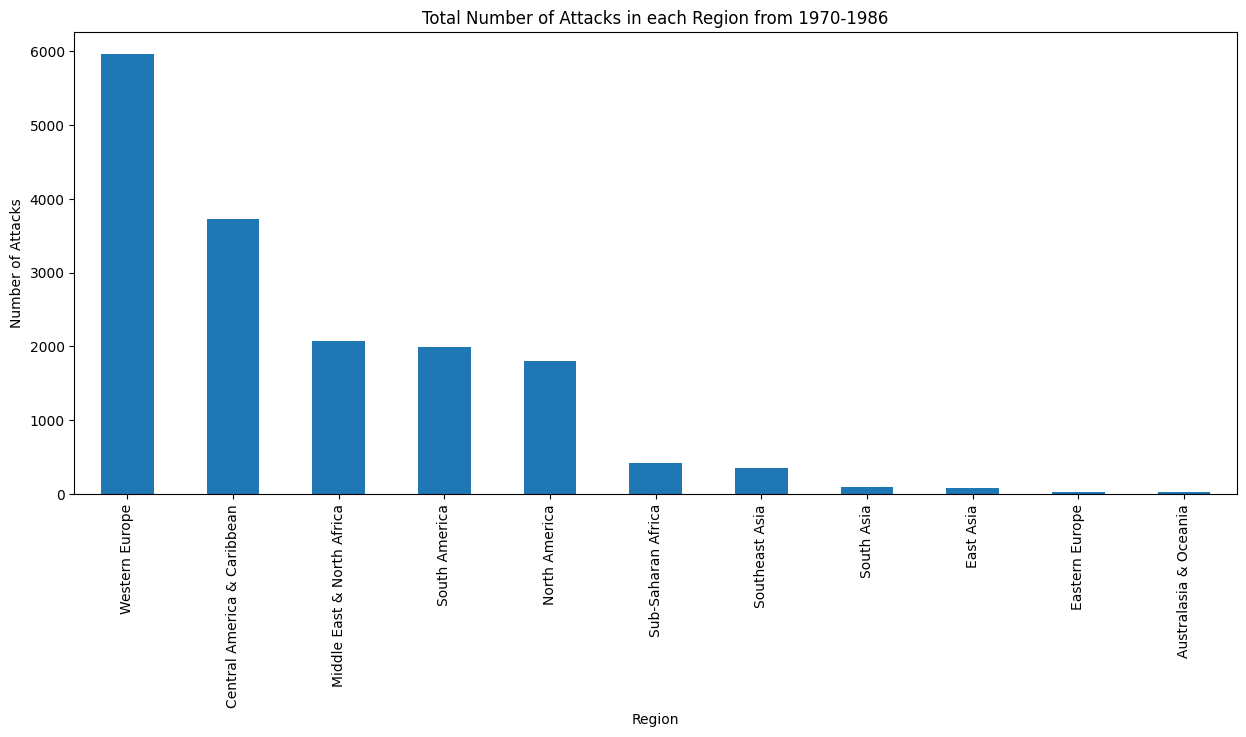

In [51]:
ra.plot(kind="bar",figsize=(15,6))
plt.title("Total Number of Attacks in each Region from 1970-1986")
plt.xlabel("Region")
plt.ylabel("Number of Attacks")
plt.show

3.Total Casualties (Killed + Wounded) in each Region

In [54]:
rc=df[["Region","Casualty"]].groupby("Region").sum().sort_values(by="Casualty",ascending=False)
rc

,Casualty
Region,
Central America & Caribbean,10884.0
Middle East & North Africa,8229.0
Western Europe,7794.0
Southeast Asia,3259.0
South America,2232.0
Sub-Saharan Africa,1479.0
North America,1034.0
South Asia,526.0
East Asia,133.0


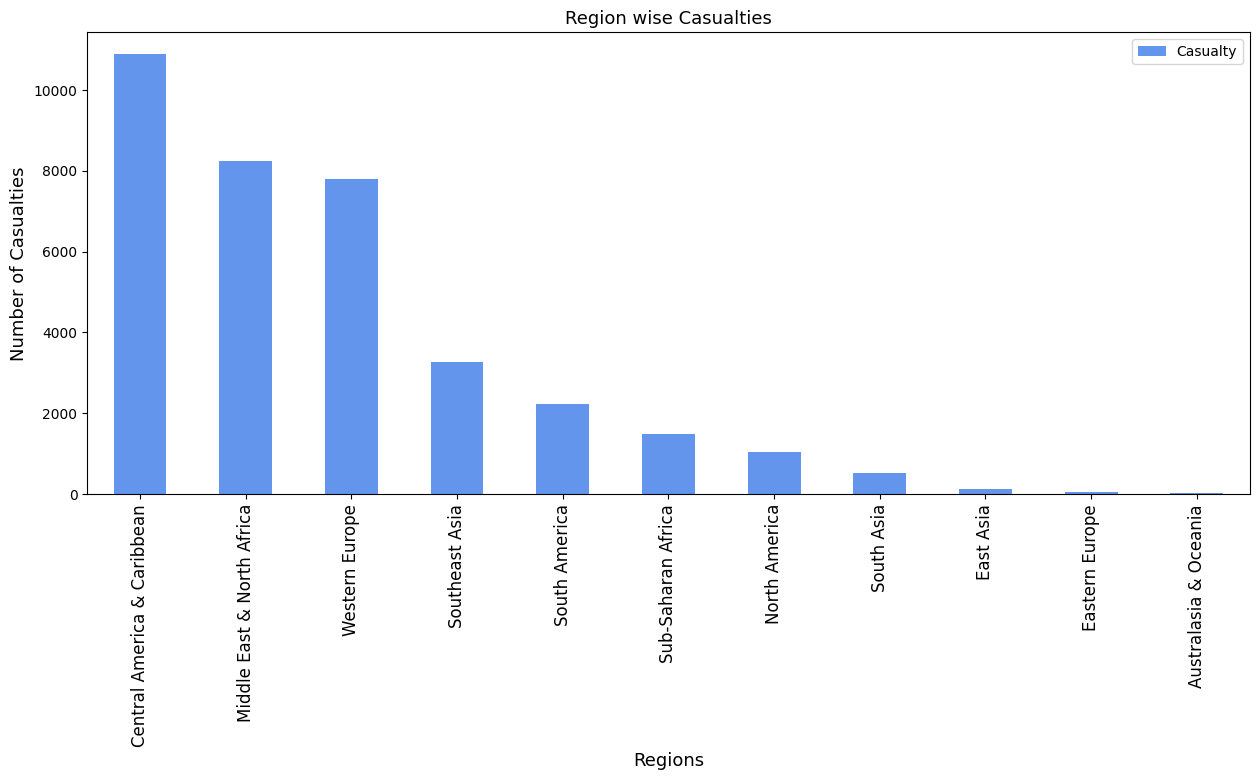

In [55]:
rc.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Region wise Casualties",fontsize=13)
plt.xlabel("Regions",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualties",fontsize=13)
plt.show()

4.Killed in each Region

In [57]:
rk=df[["Region","Killed"]].groupby("Region").sum().sort_values(by="Killed",ascending=False)
rk

,Killed
Region,
Central America & Caribbean,9145.0
Western Europe,3297.0
Middle East & North Africa,2769.0
South America,1588.0
Southeast Asia,1238.0
Sub-Saharan Africa,713.0
North America,302.0
South Asia,238.0
East Asia,38.0


5. Wounded in each Region

In [58]:
rw=df[["Region","Wounded"]].groupby("Region").sum().sort_values(by="Wounded",ascending=False)
rw

,Wounded
Region,
Middle East & North Africa,5460.0
Western Europe,4497.0
Southeast Asia,2021.0
Central America & Caribbean,1739.0
Sub-Saharan Africa,766.0
North America,732.0
South America,644.0
South Asia,288.0
East Asia,95.0


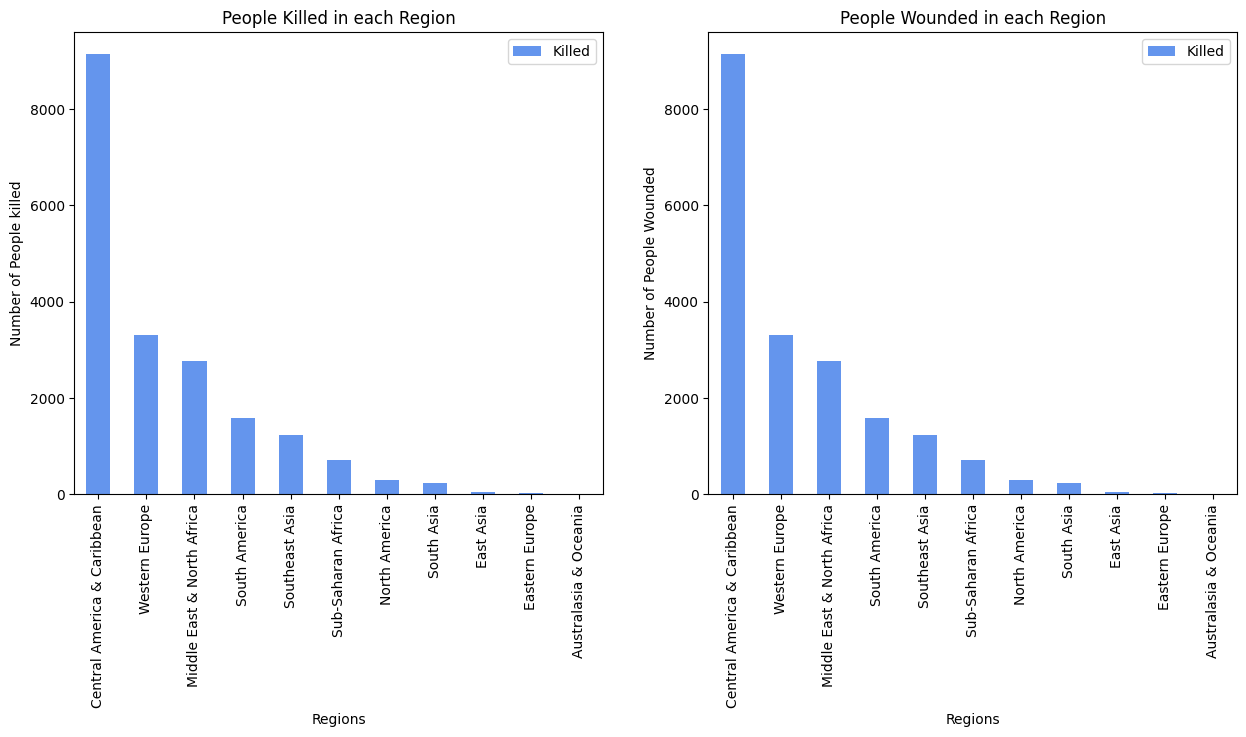

In [59]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#Killed
rk.plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax0)
ax0.set_title("People Killed in each Region")
ax0.set_xlabel("Regions")
ax0.set_ylabel("Number of People killed")

#Wounded
rk.plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax1)
ax1.set_title("People Wounded in each Region")
ax1.set_xlabel("Regions")
ax1.set_ylabel("Number of People Wounded")

plt.show()


**3. Country wise Attacks - Top 10**

  1. Number of Attacks in each Country

In [60]:
ct=df["Country"].value_counts().head(10)
ct

El Salvador       2075
United Kingdom    1965
United States     1668
Spain             1247
Italy             1213
Guatemala         1087
Colombia           869
France             669
Turkey             591
Nicaragua          402
Name: Country, dtype: int64

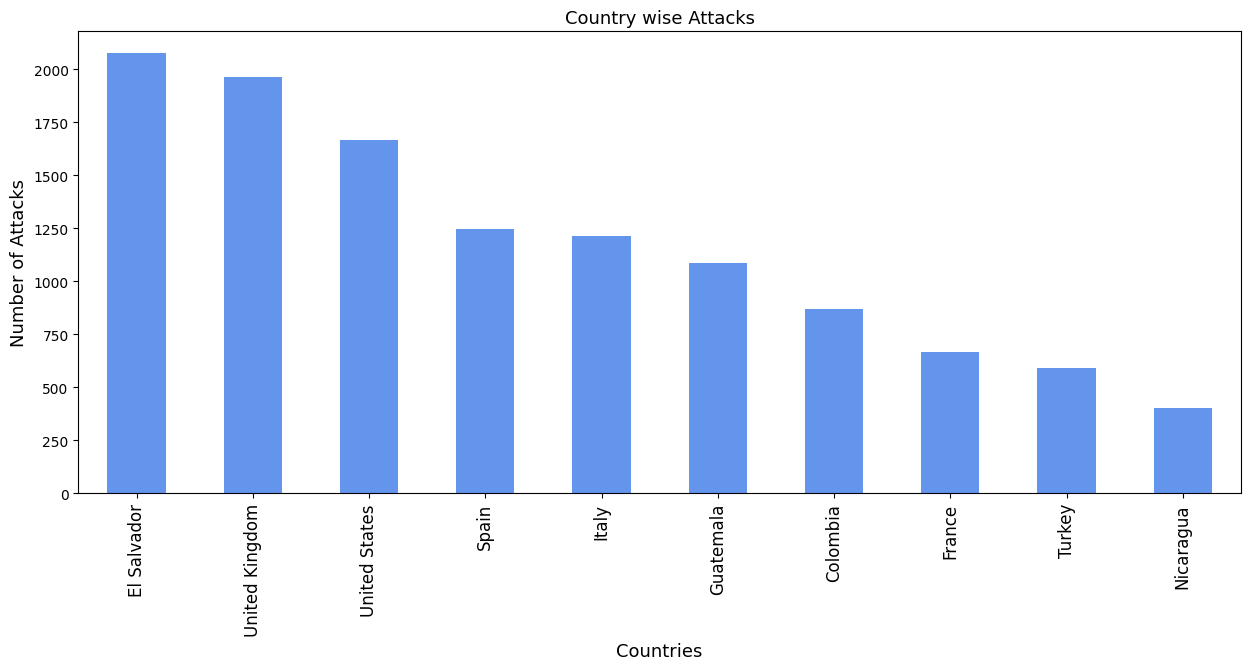

In [61]:
ct.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Country wise Attacks",fontsize=13)
plt.xlabel("Countries",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=13)
plt.show()

2. Total Casualties (Killed + Wounded) in each Country

In [62]:
cnc=df[["Country","Casualty"]].groupby("Country").sum().sort_values(by="Casualty",ascending=False)
cnc.head(10)

,Casualty
Country,
El Salvador,5838.0
Guatemala,3833.0
United Kingdom,3454.0
Lebanon,2245.0
Philippines,2195.0
Iran,1978.0
Israel,1406.0
Spain,1378.0
Colombia,1313.0


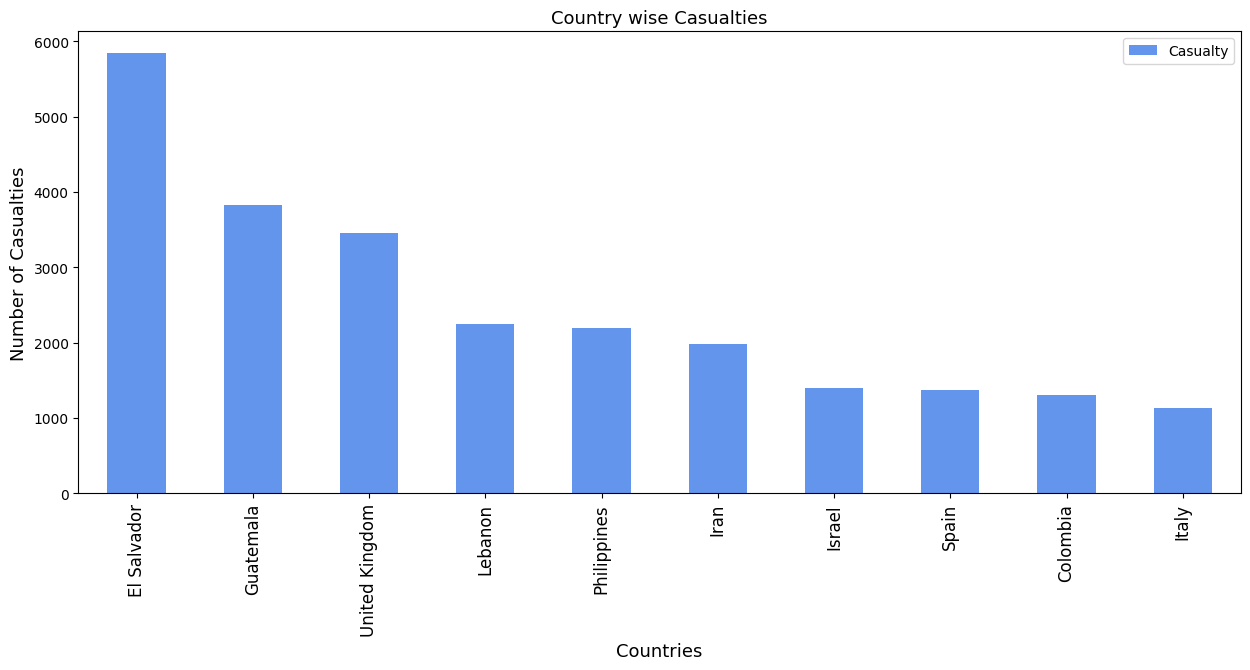

In [63]:
cnc[:10].plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Country wise Casualties",fontsize=13)
plt.xlabel("Countries",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualties",fontsize=13)
plt.show()

3. Killed in each Country

In [64]:
cnk=df[["Country","Killed"]].groupby("Country").sum().sort_values(by="Killed",ascending=False)
cnk.head()

,Killed
Country,
El Salvador,5007.0
Guatemala,3236.0
United Kingdom,1964.0
Colombia,1031.0
Iran,860.0


In [65]:
cnw=df[["Country","Wounded"]].groupby("Country").sum().sort_values(by="Wounded",ascending=False)
cnw.head(10)

,Wounded
Country,
Lebanon,1631.0
United Kingdom,1490.0
Philippines,1437.0
Israel,1134.0
Iran,1118.0
Spain,886.0
El Salvador,831.0
Italy,798.0
United States,675.0


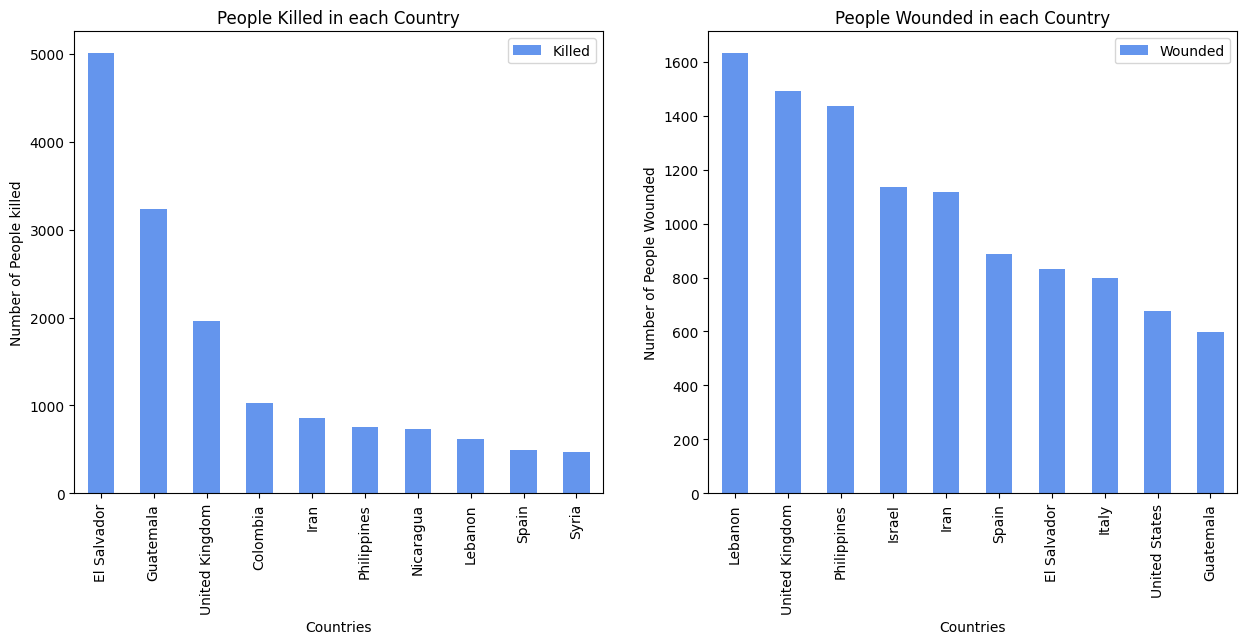

In [66]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#Killed
cnk[:10].plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax0)
ax0.set_title("People Killed in each Country")
ax0.set_xlabel("Countries")
ax0.set_ylabel("Number of People killed")

#Wounded
cnw[:10].plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax1)
ax1.set_title("People Wounded in each Country")
ax1.set_xlabel("Countries")
ax1.set_ylabel("Number of People Wounded")

plt.show()

**4. City wise Attacks - Top 10**

   1. Number of Attacks in each city

In [67]:
city=df["City"].value_counts()[1:11]
city

San Salvador      851
Unknown           825
Rome              450
Guatemala City    403
New York City     368
Paris             356
Beirut            275
Madrid            231
Bogota            226
Buenos Aires      216
Name: City, dtype: int64

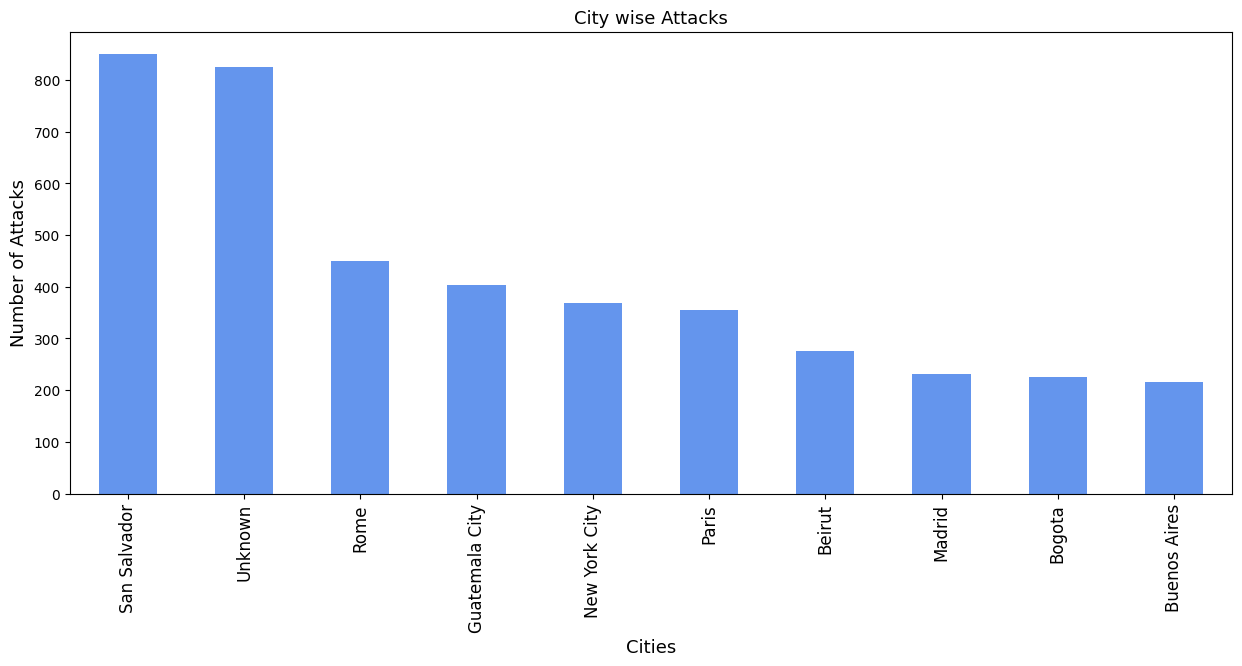

In [68]:
city.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("City wise Attacks",fontsize=13)
plt.xlabel("Cities",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=13)
plt.show()

2. Total Casualties (Killed + Wounded) in each City


In [69]:
cc=df[["City","Casualty"]].groupby("City").sum().sort_values(by="Casualty",ascending=False).drop("Unknown")
cc.head()

,Casualty
City,
Beirut,1634.0
Belfast,1303.0
San Salvador,883.0
Guatemala City,708.0
Tehran,700.0


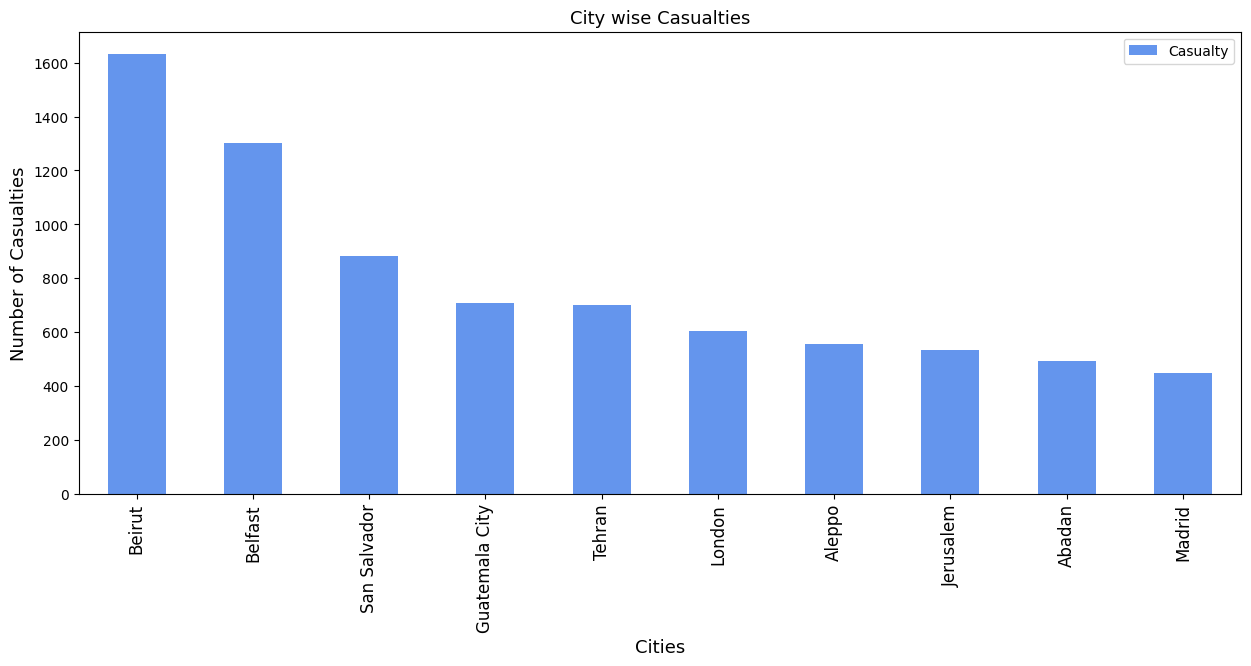

In [70]:
cc[:10].plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("City wise Casualties",fontsize=13)
plt.xlabel("Cities",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualties",fontsize=13)
plt.show()

3. Killed in each City

In [72]:
ck=df[["City","Killed"]].groupby("City").sum().sort_values(by="Killed",ascending=False).drop("Unknown")
ck.head()

,Killed
City,
Belfast,969.0
San Salvador,652.0
Guatemala City,477.0
Beirut,472.0
Abadan,429.0


4. Wounded in each City

In [73]:
cw=df[["City","Wounded"]].groupby("City").sum().sort_values(by="Wounded",ascending=False).drop("Unknown")
cw.head()

,Wounded
City,
Beirut,1162.0
London,559.0
Jerusalem,491.0
Tehran,474.0
Madrid,345.0


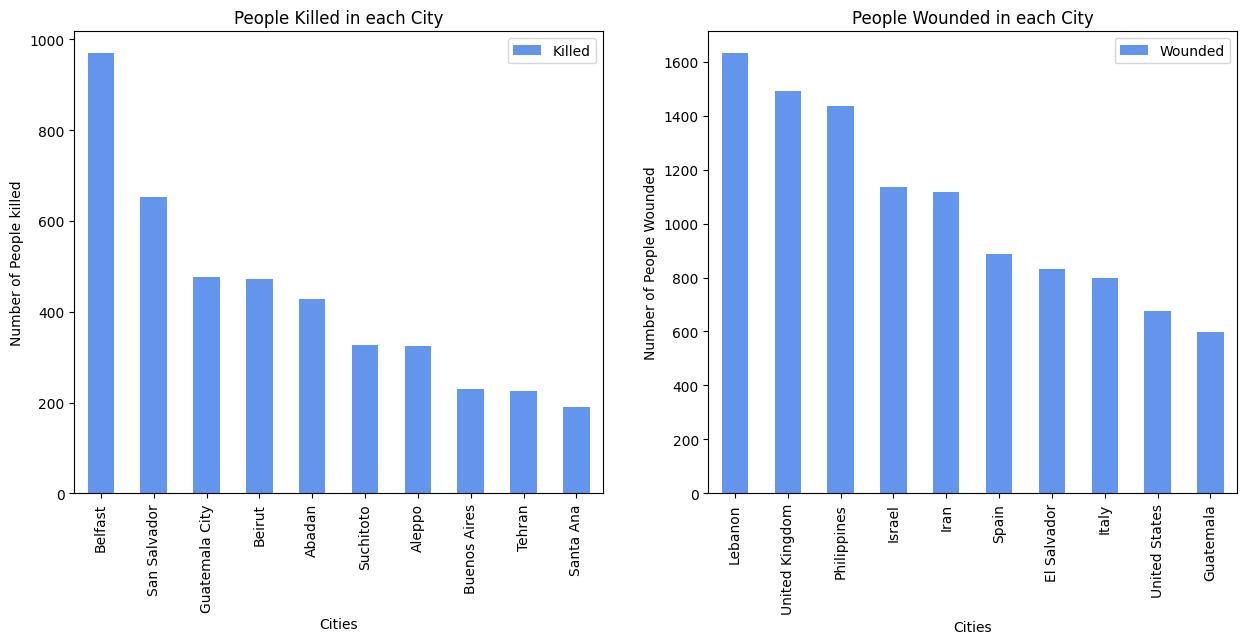

In [74]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#Killed
ck[:10].plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax0)
ax0.set_title("People Killed in each City")
ax0.set_xlabel("Cities")
ax0.set_ylabel("Number of People killed")

#Wounded
cnw[:10].plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax1)
ax1.set_title("People Wounded in each City")
ax1.set_xlabel("Cities")
ax1.set_ylabel("Number of People Wounded")

plt.show()

**5. Terrorist Group wise Attacks - Top 10**

  1. Number of Attacks by each group

In [75]:
grp=df["Group Name"].value_counts()[1:10]
grp

Irish Republican Army (IRA)                         1259
Basque Fatherland and Freedom (ETA)                  671
Farabundo Marti National Liberation Front (FMLN)     389
Palestinians                                         338
Revolutionary Armed Forces of Colombia (FARC)        232
M-19 (Movement of April 19)                          220
Protestant extremists                                211
Red Brigades                                         207
Shining Path (SL)                                    199
Name: Group Name, dtype: int64

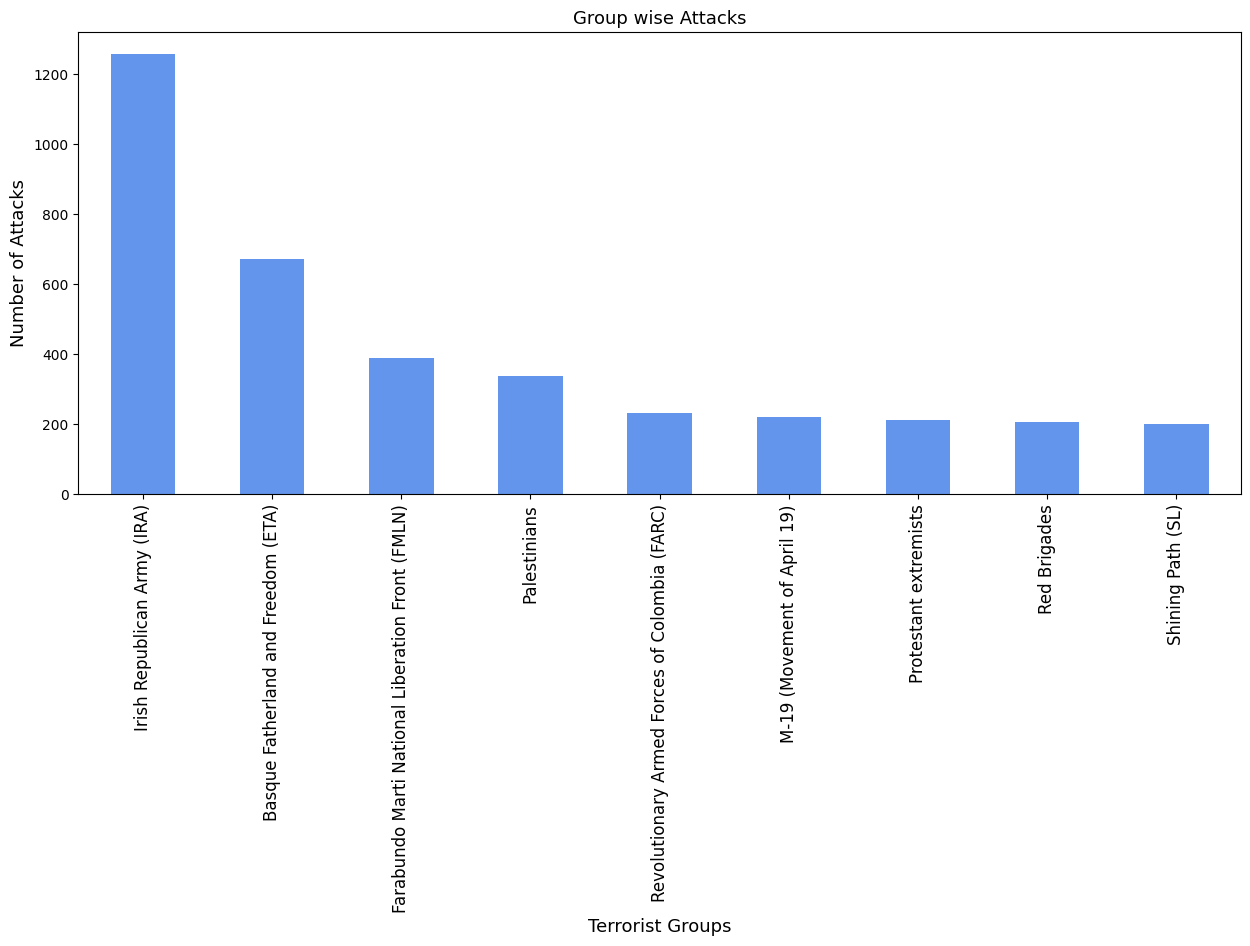

In [76]:
grp.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Group wise Attacks",fontsize=13)
plt.xlabel("Terrorist Groups",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=13)
plt.show()

2. Total Casualties(Killed + Wounded) by each Group

In [78]:
gc=df[["Group Name","Casualty"]].groupby("Group Name").sum().sort_values(by="Casualty",ascending=False).drop("Unknown")
gc.head()

,Casualty
Group Name,
Irish Republican Army (IRA),2534.0
Farabundo Marti National Liberation Front (FMLN),1686.0
Basque Fatherland and Freedom (ETA),962.0
Front for the Liberation of Lebanon from Foreigners,902.0
Moro National Liberation Front (MNLF),886.0


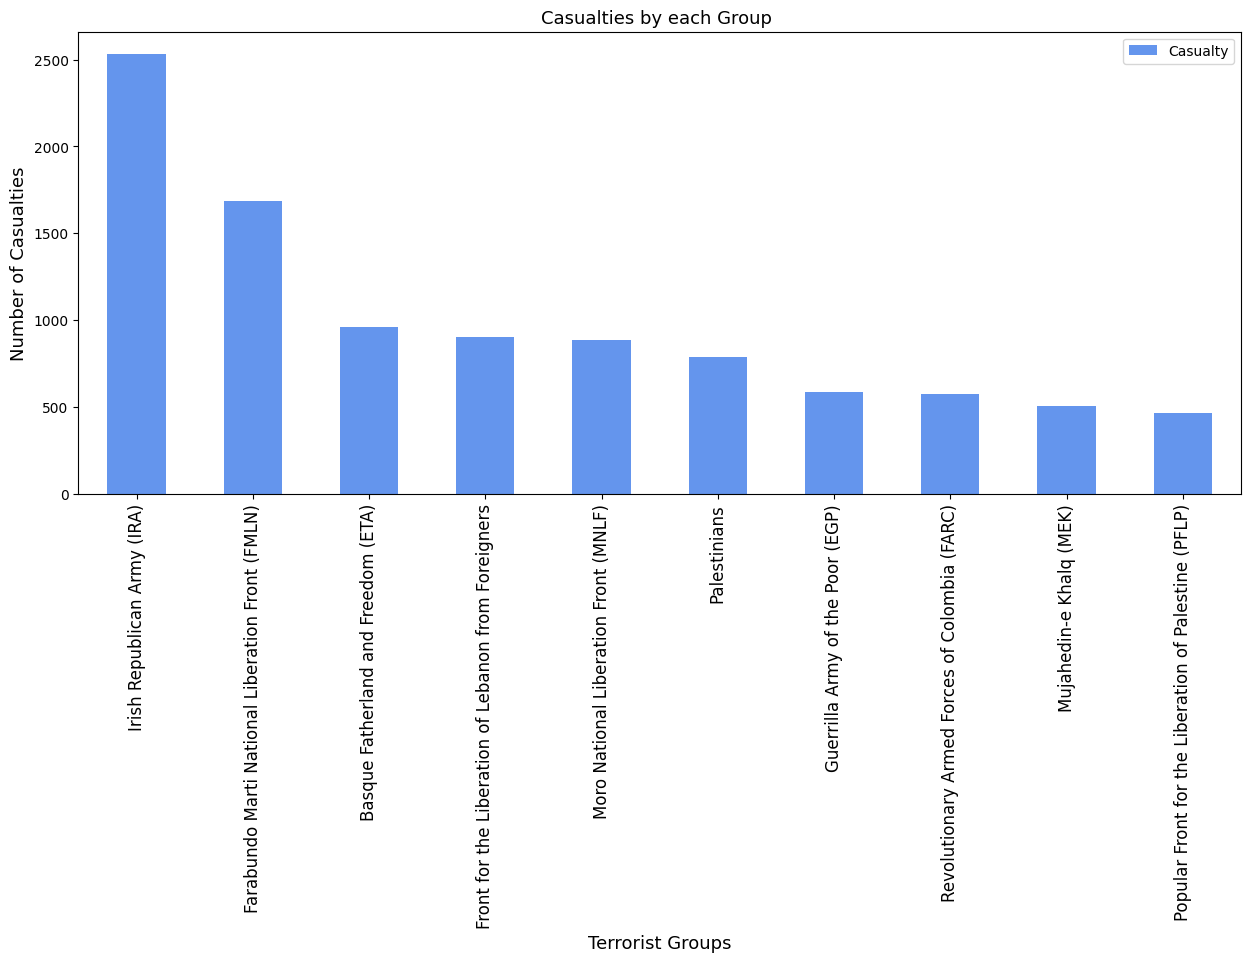

In [79]:
gc.head(10).plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Casualties by each Group ",fontsize=13)
plt.xlabel("Terrorist Groups",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualties",fontsize=13)
plt.show()

3. Killed by each Group

In [80]:
gk=df[["Group Name","Killed"]].groupby("Group Name").sum().sort_values(by="Killed",ascending=False).drop("Unknown")
gk.head(10)

,Killed
Group Name,
Farabundo Marti National Liberation Front (FMLN),1405.0
Irish Republican Army (IRA),1161.0
Guerrilla Army of the Poor (EGP),533.0
Revolutionary Armed Forces of Colombia (FARC),497.0
Mujahedin-e Khalq (MEK),468.0
Basque Fatherland and Freedom (ETA),343.0
Moro National Liberation Front (MNLF),325.0
Death Squad,299.0
Ulster Volunteer Force (UVF),289.0


4. Wounded by each Group

In [81]:
gw=df[["Group Name","Wounded"]].groupby("Group Name").sum().sort_values(by="Wounded",ascending=False).drop("Unknown")
gw.head(10)

,Wounded
Group Name,
Irish Republican Army (IRA),1373.0
Palestinians,674.0
Front for the Liberation of Lebanon from Foreigners,662.0
Basque Fatherland and Freedom (ETA),619.0
Moro National Liberation Front (MNLF),561.0
Popular Front for the Liberation of Palestine (PFLP),383.0
Farabundo Marti National Liberation Front (FMLN),281.0
Armed Revolutionary Nuclei (NAR),243.0
Neo-Nazi extremists,227.0


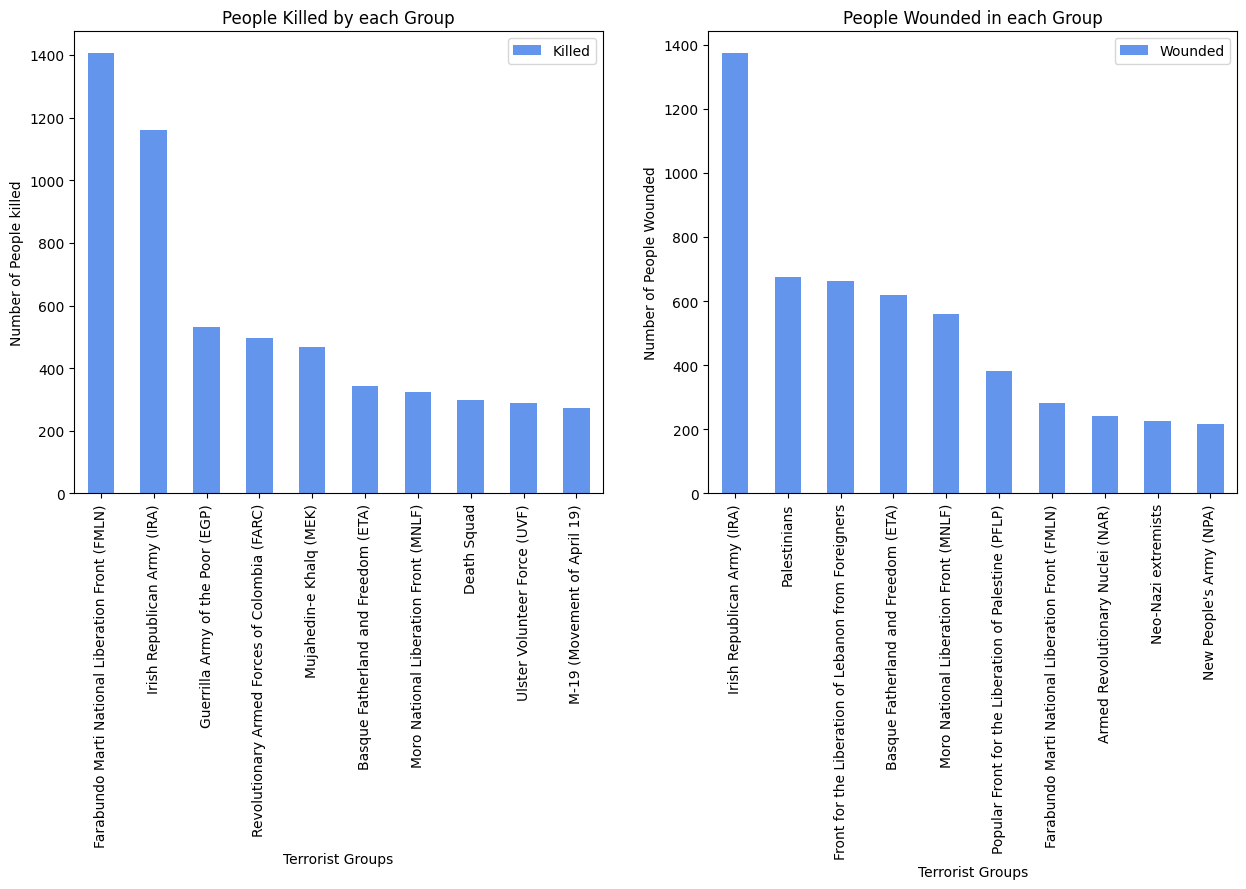

In [82]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#Killed
gk[:10].plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax0)
ax0.set_title("People Killed by each Group")
ax0.set_xlabel("Terrorist Groups")
ax0.set_ylabel("Number of People killed")

#Wounded
gw[:10].plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax1)
ax1.set_title("People Wounded in each Group")
ax1.set_xlabel("Terrorist Groups")
ax1.set_ylabel("Number of People Wounded")

plt.show()

**6. Attack Type wise Attacks**

   1. Number of Attacks by each Attack Type

In [83]:
at=df["Attack Type"].value_counts()
at

Bombing/Explosion                      7009
Assassination                          3247
Armed Assault                          3071
Facility/Infrastructure Attack         1502
Hostage Taking (Kidnapping)             846
Unknown                                 495
Hostage Taking (Barricade Incident)     283
Hijacking                                98
Unarmed Assault                          30
Name: Attack Type, dtype: int64

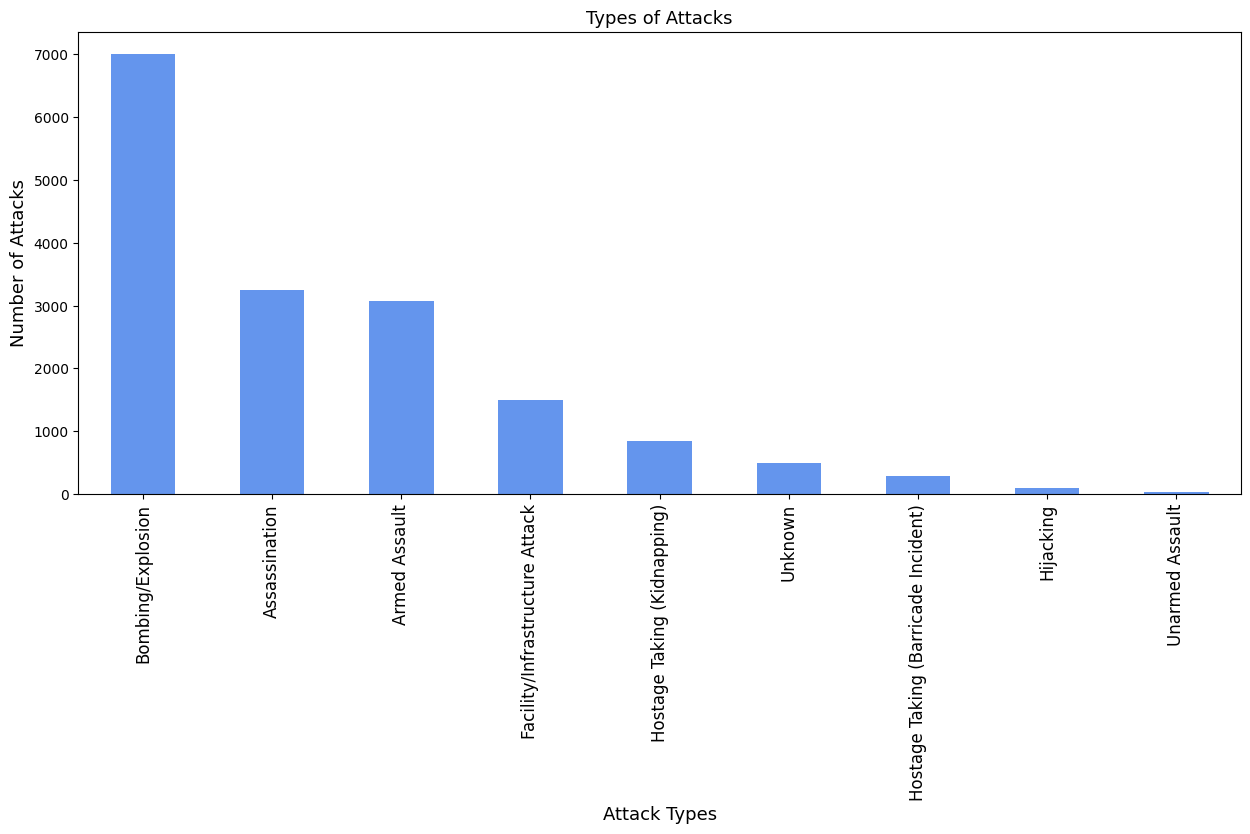

In [84]:
at.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Types of Attacks",fontsize=13)
plt.xlabel("Attack Types",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=13)
plt.show()

2. Total Casualties (Killed + Wounded) by each Attack Type

In [85]:
ac=df[["Attack Type","Casualty"]].groupby("Attack Type").sum().sort_values(by="Casualty",ascending=False).drop("Unknown")
ac

,Casualty
Attack Type,
Bombing/Explosion,16358.0
Armed Assault,11526.0
Assassination,4487.0
Facility/Infrastructure Attack,906.0
Hostage Taking (Barricade Incident),523.0
Hostage Taking (Kidnapping),421.0
Hijacking,249.0
Unarmed Assault,27.0


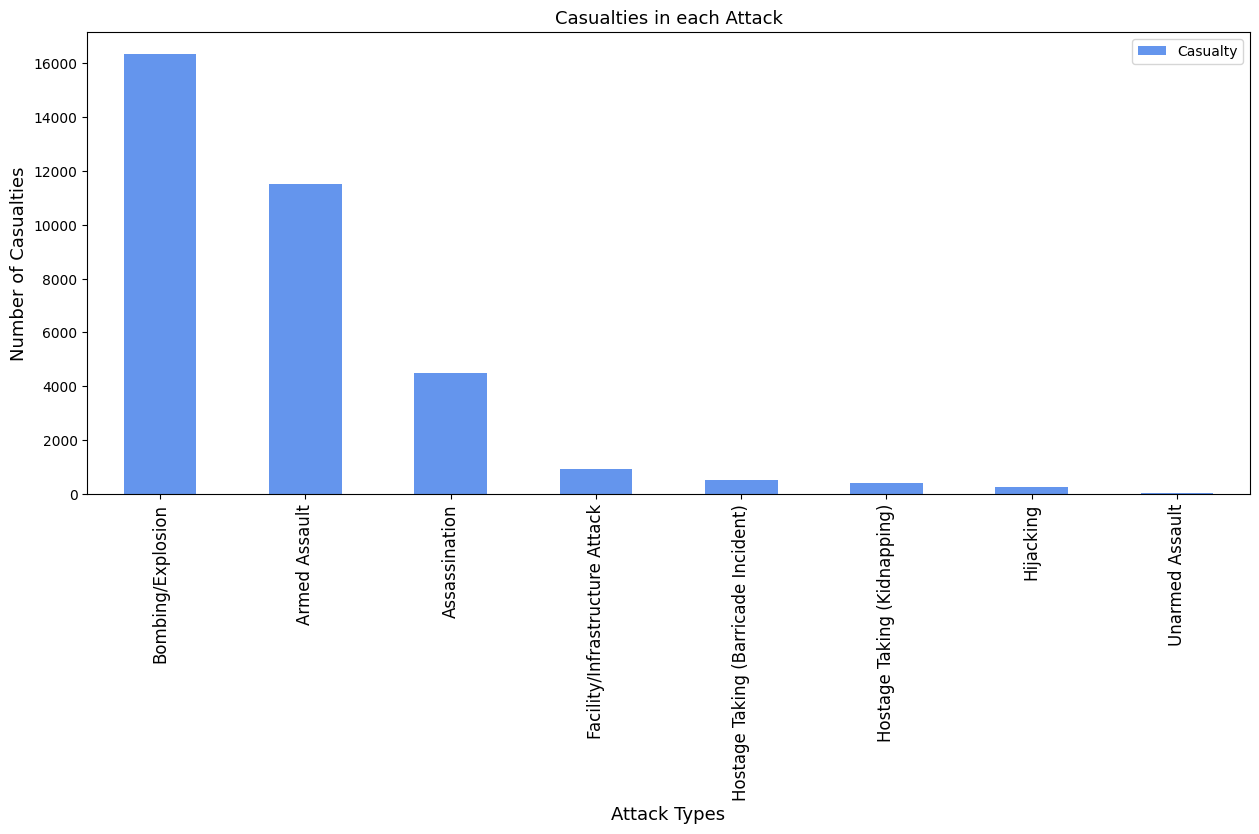

In [86]:
ac.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Casualties in each Attack",fontsize=13)
plt.xlabel("Attack Types",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualties",fontsize=13)
plt.show()

3. Killed by each Attack Type

In [87]:
ak=df[["Attack Type","Killed"]].groupby("Attack Type").sum().sort_values(by="Killed",ascending=False).drop("Unknown")
ak

,Killed
Attack Type,
Armed Assault,9155.0
Bombing/Explosion,4313.0
Assassination,3560.0
Facility/Infrastructure Attack,585.0
Hostage Taking (Kidnapping),362.0
Hostage Taking (Barricade Incident),232.0
Hijacking,184.0
Unarmed Assault,17.0


4. Wounded by each Attack Type

In [89]:
aw=df[["Attack Type","Wounded"]].groupby("Attack Type").sum().sort_values(by="Wounded",ascending=False).drop("Unknown")
aw

,Wounded
Attack Type,
Bombing/Explosion,12045.0
Armed Assault,2371.0
Assassination,927.0
Facility/Infrastructure Attack,321.0
Hostage Taking (Barricade Incident),291.0
Hijacking,65.0
Hostage Taking (Kidnapping),59.0
Unarmed Assault,10.0


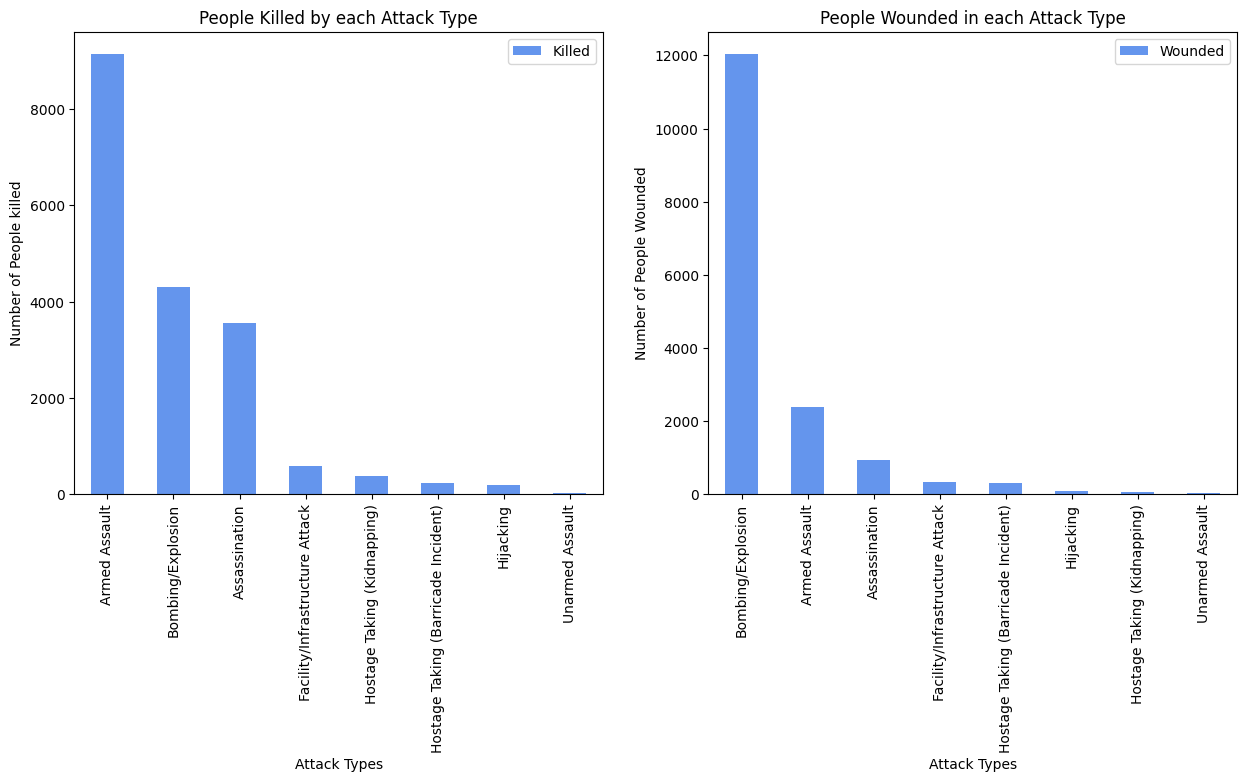

In [90]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#Killed
ak.plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax0)
ax0.set_title("People Killed by each Attack Type")
ax0.set_xlabel("Attack Types")
ax0.set_ylabel("Number of People killed")

#Wounded
aw.plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax1)
ax1.set_title("People Wounded in each Attack Type")
ax1.set_xlabel("Attack Types")
ax1.set_ylabel("Number of People Wounded")

plt.show()

**7. Target Type wise Attacks**

   1. Number of Attacks over each Target Type

In [91]:
ta=df["Target Type"].value_counts()
ta

Business                          3632
Private Citizens & Property       2628
Government (General)              2087
Military                          2054
Police                            1665
Government (Diplomatic)            989
Transportation                     575
Journalists & Media                494
Utilities                          475
Educational Institution            466
Airports & Aircraft                448
Religious Figures/Institutions     215
Terrorists/Non-State Militia       210
Unknown                            201
Telecommunication                  145
Violent Political Party             88
Tourists                            58
NGO                                 52
Food or Water Supply                39
Maritime                            33
Abortion Related                    19
Other                                8
Name: Target Type, dtype: int64

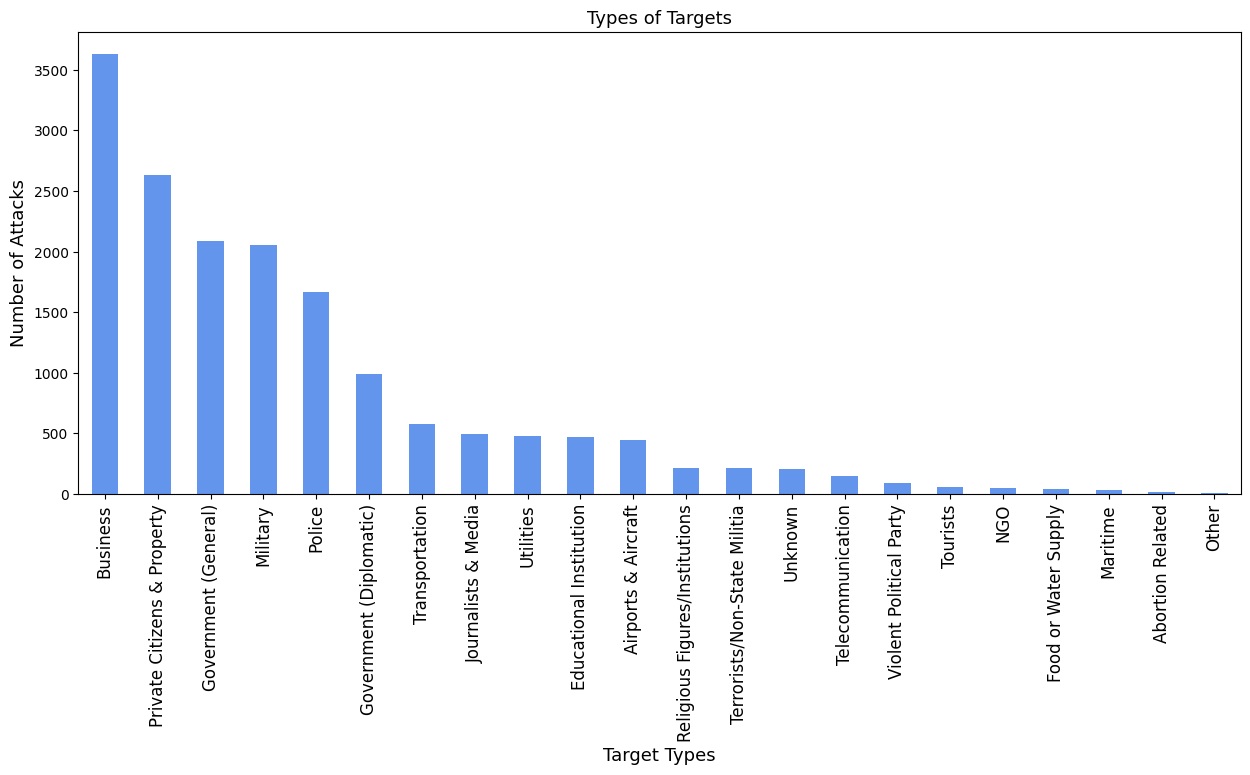

In [92]:
ta.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Types of Targets",fontsize=13)
plt.xlabel("Target Types",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=13)
plt.show()

In [93]:
tc=df[["Target Type","Casualty"]].groupby("Target Type").sum().sort_values(by="Casualty",ascending=False).drop("Unknown")
tc

,Casualty
Target Type,
Military,8349.0
Private Citizens & Property,6998.0
Business,5161.0
Police,3610.0
Government (General),2611.0
Transportation,2164.0
Airports & Aircraft,2026.0
Government (Diplomatic),858.0
Religious Figures/Institutions,680.0


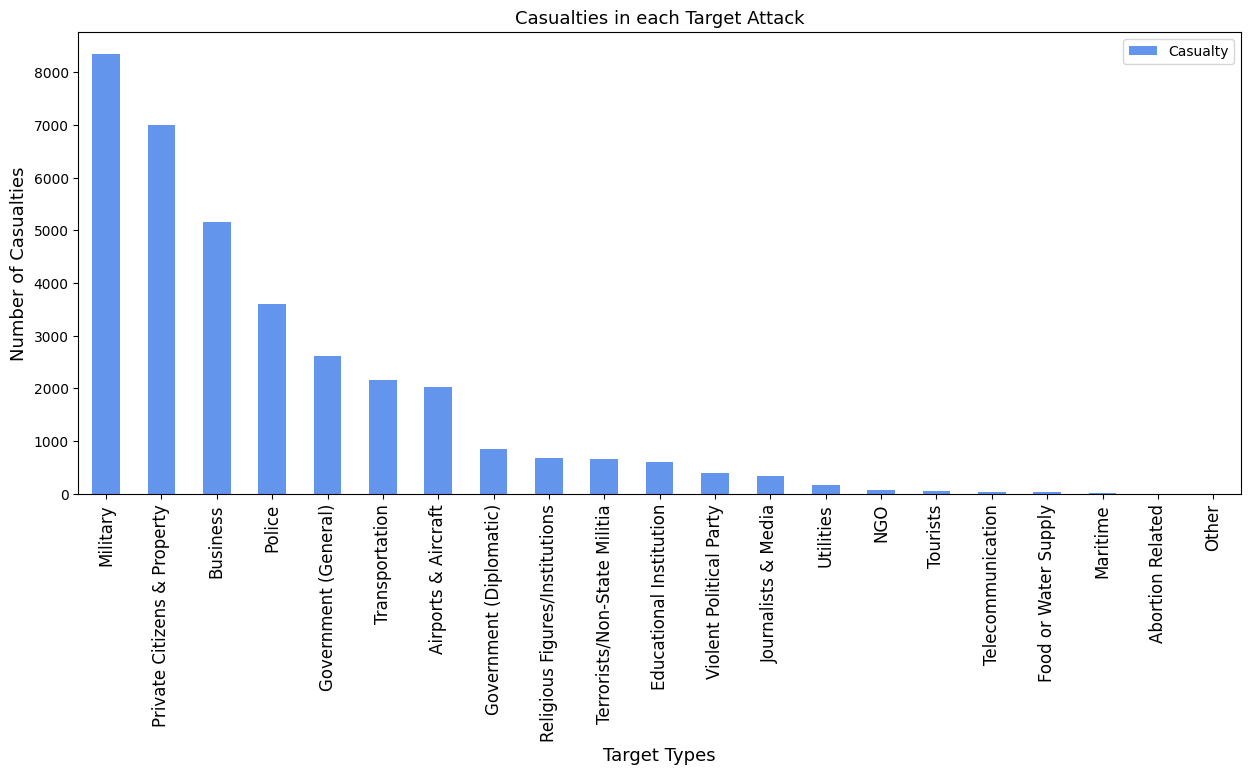

In [94]:
tc.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Casualties in each Target Attack",fontsize=13)
plt.xlabel("Target Types",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualties",fontsize=13)
plt.show()

In [95]:
tk=df[["Target Type","Killed"]].groupby("Target Type").sum().sort_values(by="Killed",ascending=False).drop("Unknown")
tk

,Killed
Target Type,
Military,6644.0
Private Citizens & Property,4021.0
Police,2023.0
Business,1965.0
Government (General),1076.0
Airports & Aircraft,881.0
Transportation,687.0
Terrorists/Non-State Militia,420.0
Government (Diplomatic),290.0


In [96]:
tw=df[["Target Type","Wounded"]].groupby("Target Type").sum().sort_values(by="Wounded",ascending=False).drop("Unknown")
tw

,Wounded
Target Type,
Business,3196.0
Private Citizens & Property,2977.0
Military,1705.0
Police,1587.0
Government (General),1535.0
Transportation,1477.0
Airports & Aircraft,1145.0
Government (Diplomatic),568.0
Religious Figures/Institutions,497.0


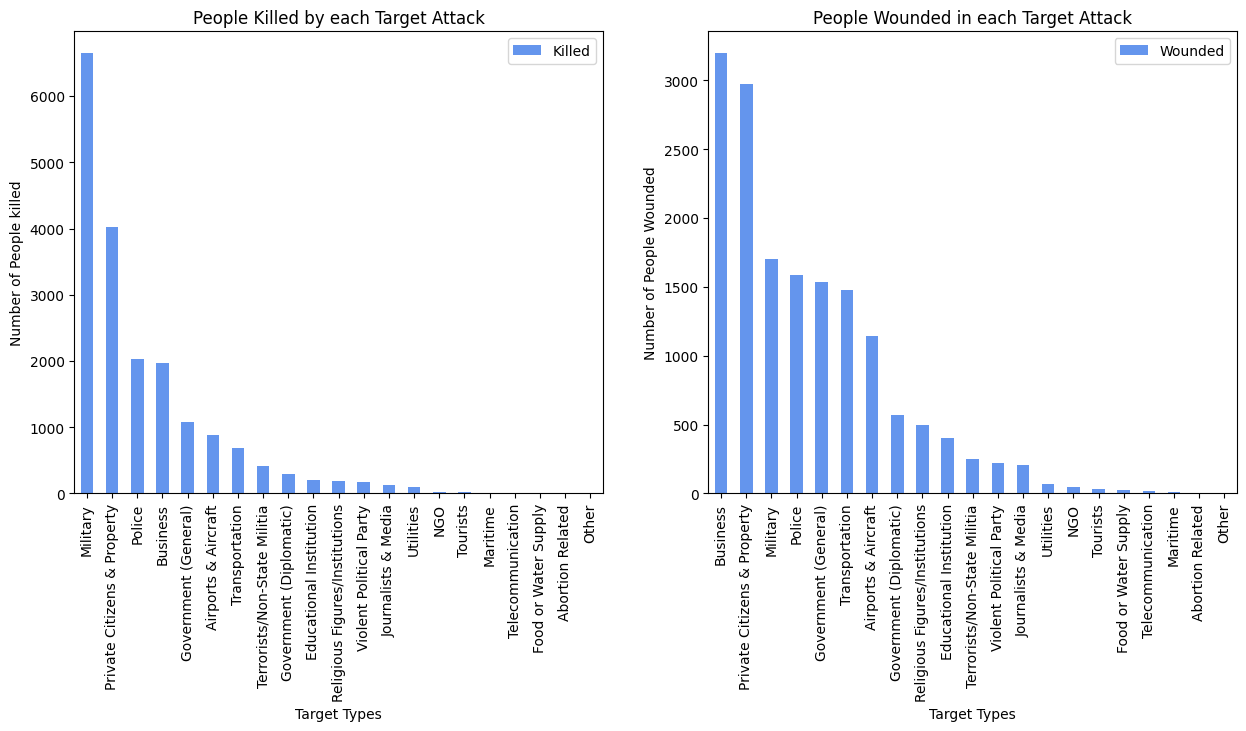

In [97]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#Killed
tk.plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax0)
ax0.set_title("People Killed by each Target Attack")
ax0.set_xlabel("Target Types")
ax0.set_ylabel("Number of People killed")

#Wounded
tw.plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax1)
ax1.set_title("People Wounded in each Target Attack")
ax1.set_xlabel("Target Types")
ax1.set_ylabel("Number of People Wounded")

plt.show()

**8. Group + Country wise - Top10**

   1. Sorting by number of Attacks

In [98]:
gca=df[["Group Name","Country"]].value_counts().drop("Unknown")
gca.head(10)

<ipython-input-98-e3f050b9d645>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  gca=df[["Group Name","Country"]].value_counts().drop("Unknown")


Group Name                                        Country       
Irish Republican Army (IRA)                       United Kingdom    1203
Basque Fatherland and Freedom (ETA)               Spain              662
Farabundo Marti National Liberation Front (FMLN)  El Salvador        382
Revolutionary Armed Forces of Colombia (FARC)     Colombia           232
M-19 (Movement of April 19)                       Colombia           217
Palestinians                                      Israel             213
Protestant extremists                             United Kingdom     209
Red Brigades                                      Italy              205
Shining Path (SL)                                 Peru               199
Sandinista National Liberation Front (FSLN)       Nicaragua          193
dtype: int64

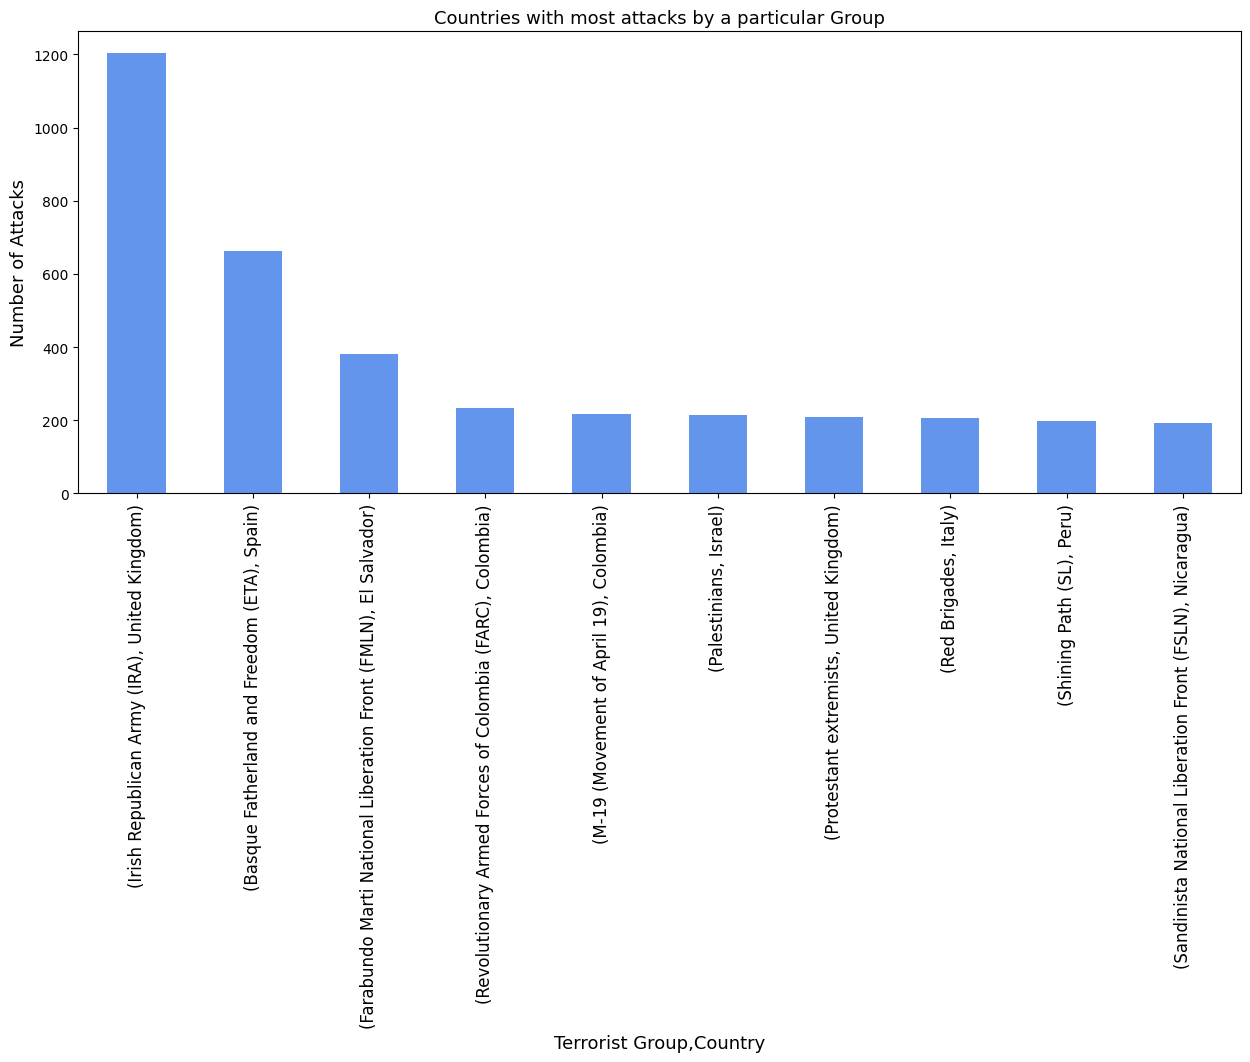

In [104]:
gca.head(10).plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Countries with most attacks by a particular Group",fontsize=13)
plt.xlabel("Terrorist Group,Country",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=13)
plt.show()

2. Sorting by Number of Casualties

In [113]:
gcc=df[["Group Name","Country","Casualty"]].groupby(["Group Name","Country"],axis=0).sum().sort_values(by="Casualty",ascending=False).drop("Unknown")
gcc

<ipython-input-113-3d9754b7e34b>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  gcc=df[["Group Name","Country","Casualty"]].groupby(["Group Name","Country"],axis=0).sum().sort_values(by="Casualty",ascending=False).drop("Unknown")


,,Casualty
Group Name,Country,
Irish Republican Army (IRA),United Kingdom,2463.0
Farabundo Marti National Liberation Front (FMLN),El Salvador,1677.0
Basque Fatherland and Freedom (ETA),Spain,957.0
Moro National Liberation Front (MNLF),Philippines,886.0
Front for the Liberation of Lebanon from Foreigners,Lebanon,668.0
...,...,...
Popular Front for the Liberation of Palestine (PFLP),Italy,0.0
Ecology and Antinuclear Revolutionary Party (CRAE),France,0.0
East Timorese extremists,Spain,0.0


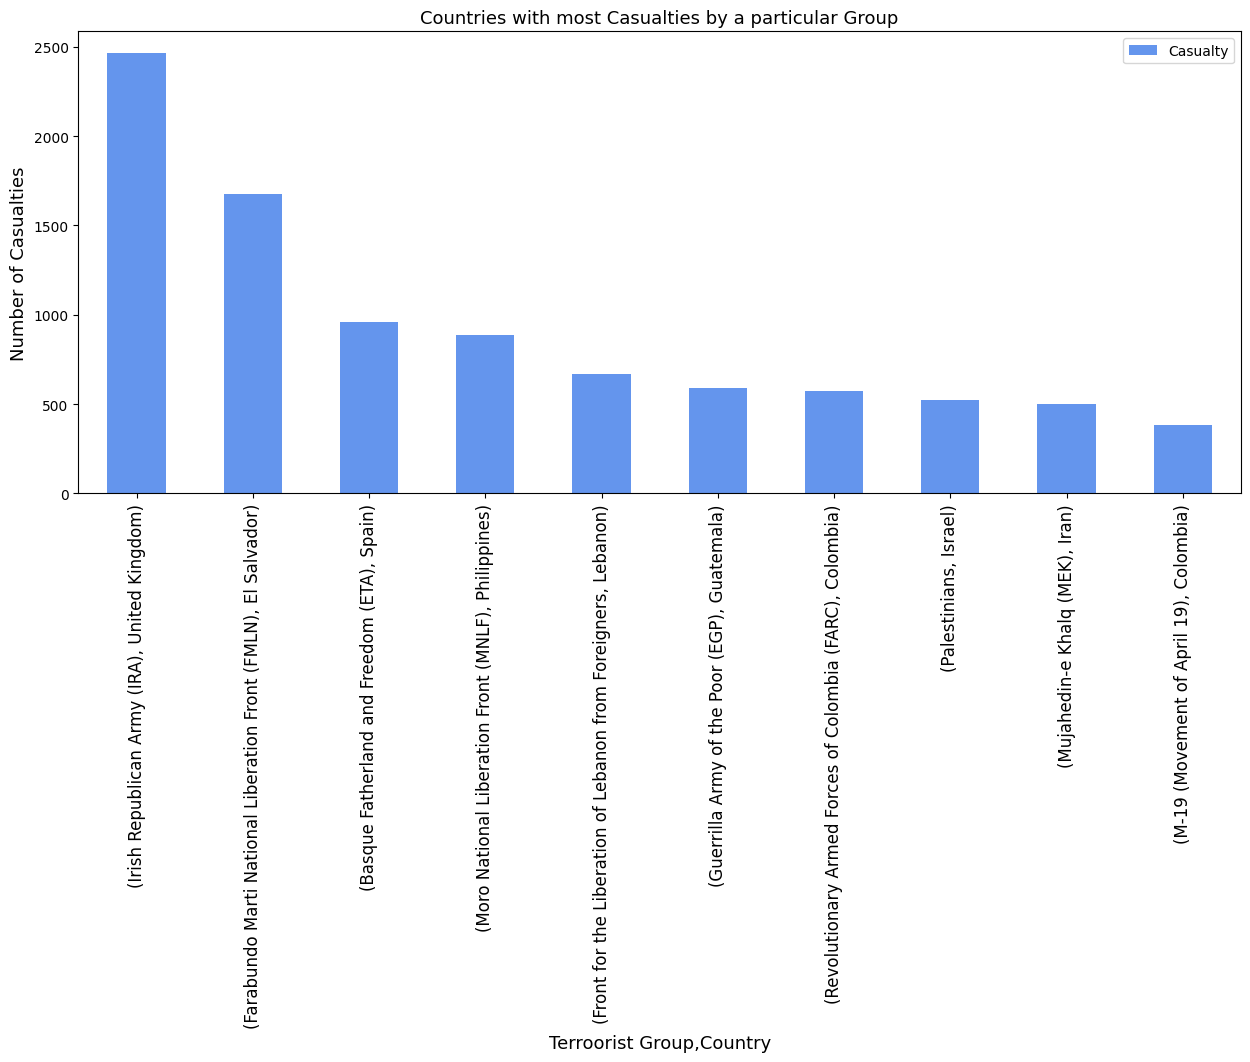

In [116]:
gcc.head(10).plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Countries with most Casualties by a particular Group",fontsize=13)
plt.xlabel("Terroorist Group,Country",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualties",fontsize=13)
plt.show()

3. sorting by Number of People Killed

In [117]:
gck=df[["Group Name","Country","Killed"]].groupby(["Group Name","Country"],axis=0).sum().sort_values(by="Killed",ascending=False).drop("Unknown")
gck

<ipython-input-117-94974be27851>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  gck=df[["Group Name","Country","Killed"]].groupby(["Group Name","Country"],axis=0).sum().sort_values(by="Killed",ascending=False).drop("Unknown")


Killed
Group Name                                       Country               
Farabundo Marti National Liberation Front (FMLN) El Salvador     1400.0
Irish Republican Army (IRA)                      United Kingdom  1124.0
Guerrilla Army of the Poor (EGP)                 Guatemala        533.0
Revolutionary Armed Forces of Colombia (FARC)    Colombia         497.0
Mujahedin-e Khalq (MEK)                          Iran             467.0
...                                                                 ...
International Revolutionary Action Group (GARI)  Portugal           0.0
                                                 Switzerland        0.0
                                                 Turkey             0.0
International Revolutionary Solidarity           France             0.0
Zimbabwe People's Army (ZIPA)                    Rhodesia           0.0

[1305 rows x 1 columns]

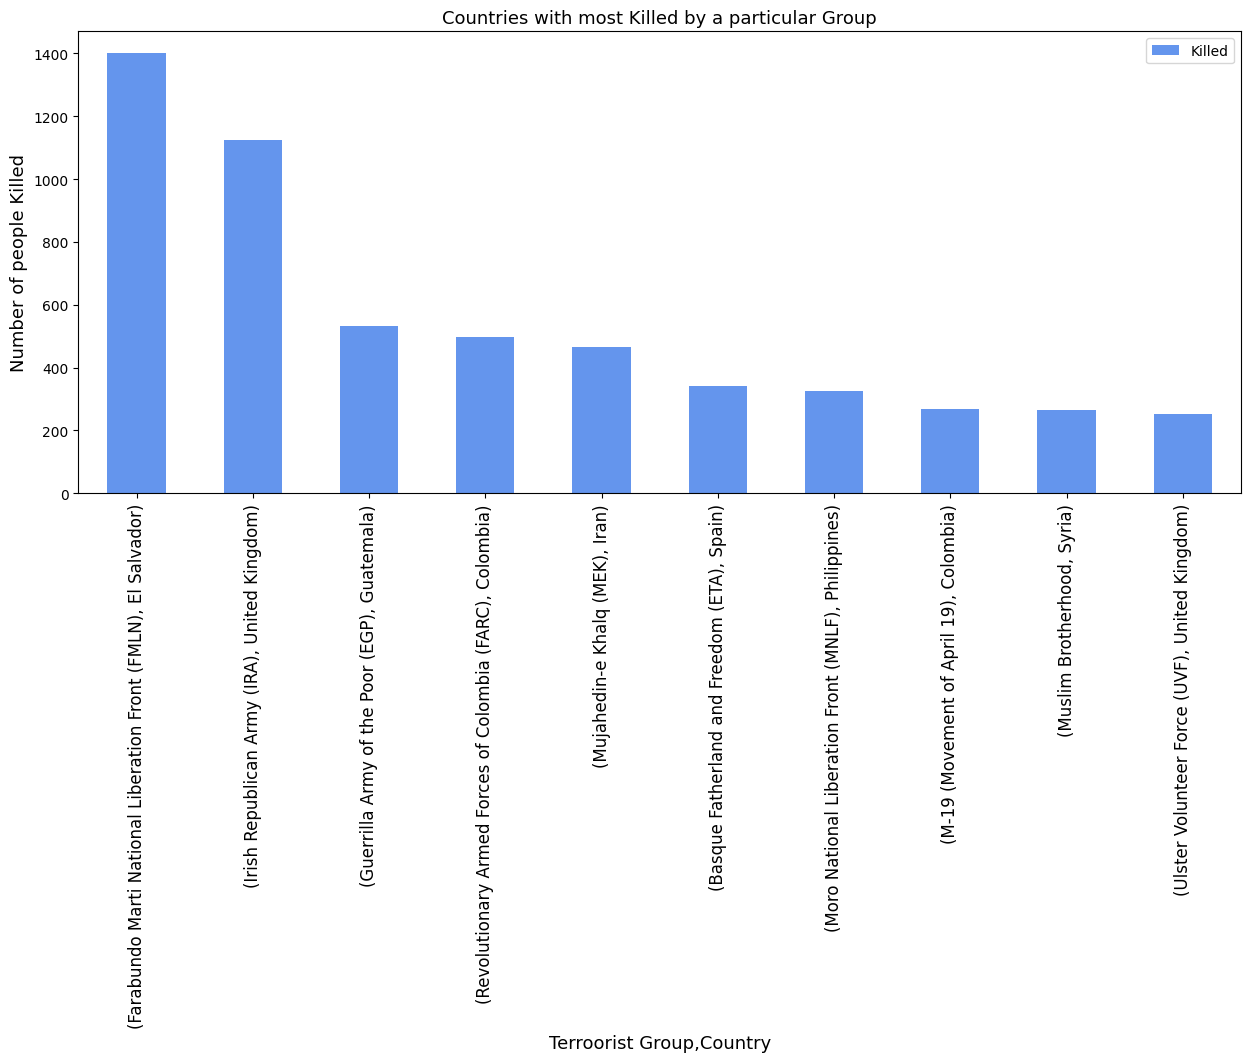

In [118]:
gck.head(10).plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Countries with most Killed by a particular Group",fontsize=13)
plt.xlabel("Terroorist Group,Country",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of people Killed",fontsize=13)
plt.show()

4. Sorting by Number of People Wounded

In [119]:
gcw=df[["Group Name","Country","Wounded"]].groupby(["Group Name","Country"],axis=0).sum().sort_values(by="Wounded",ascending=False).drop("Unknown")
gcw

<ipython-input-119-1f99d658df50>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  gcw=df[["Group Name","Country","Wounded"]].groupby(["Group Name","Country"],axis=0).sum().sort_values(by="Wounded",ascending=False).drop("Unknown")


,,Wounded
Group Name,Country,
Irish Republican Army (IRA),United Kingdom,1339.0
Basque Fatherland and Freedom (ETA),Spain,617.0
Moro National Liberation Front (MNLF),Philippines,561.0
Front for the Liberation of Lebanon from Foreigners,Lebanon,519.0
Palestinians,Israel,468.0
...,...,...
National Integration Front (FIN),United States,0.0
National Liberation Army (El Salvador),El Salvador,0.0
Commandos for the Defense of Western Civilization,Portugal,0.0


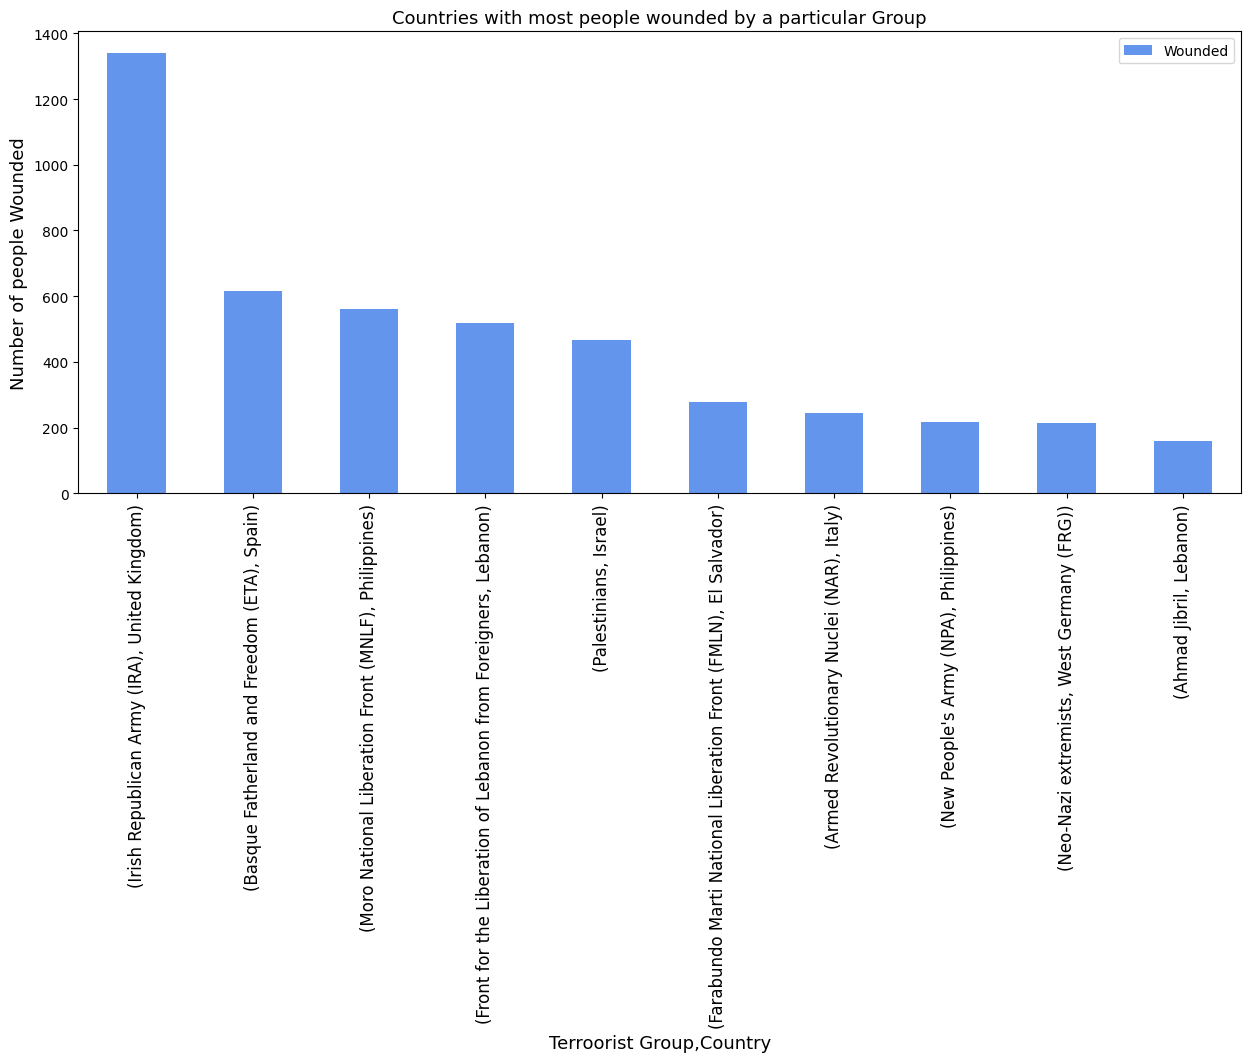

In [120]:
gcw.head(10).plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Countries with most people wounded by a particular Group",fontsize=13)
plt.xlabel("Terroorist Group,Country",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of people Wounded",fontsize=13)
plt.show()

**9. Humanity Affected (World-wide) by Terrorist Attacks from 1970 to 1986**

   1. Total Casualties (Killed + Wounded) due to Terrorist Attacks
  

In [128]:
casualty=df.loc[:,"Casualty"].sum()
print("Total number of Casualties due to Terrorist Attacks from 1970 to 1986 across the world :\n",casualty)

Total number of Casualties due to Terrorist Attacks from 1970 to 1986 across the world :
 35657.0


2. Killed due to Terrorist Attacks

In [130]:
kill=df.loc[:,"Killed"].sum()
print("Total number of killed due to Terrorist Attacks from 1970 to 1986 across the world :\n",kill)

Total number of killed due to Terrorist Attacks from 1970 to 1986 across the world :
 19367.0


3. Wounded due to Terrorist Attacks

In [131]:
wound=df.loc[:,"Wounded"].sum()
print("Total number of Wounded due to Terrorist Attacks from 1970 to 1986 across the world :\n",wound)

Total number of Wounded due to Terrorist Attacks from 1970 to 1986 across the world :
 16290.0


# **Observations**

1.   Year wise Attacks:

*   Attacks

*   Casualties
*   Killed


*   Wounded

2.  Region wise Attacks:

*   Attacks

*   Casualties
*   Killed


*   Wounded  

3.   Country wise Attacks [Top 10]:

*   Attacks

*   Casualties
*   Killed


*   Wounded
   


4.   City wise Attacks [Top 10]:

*   Attacks

*   Casualties
*   Killed


*   Wounded

5.   Terrorist Group wise Attacks [Top 10]:

*   Attacks

*   Casualties
*   Killed


*   Wounded
6.   Attack Type wise Attacks:

*   Attacks

*   Casualties
*   Killed


*   Wounded

7.   Target Type wise Attacks:

*   Attacks

*   Casualties
*   Killed


*   Wounded

8.   Group and Country wise Attacks [Top 10]:

*   Attacks

*   Casualties
*   Killed


*   Wounded



9.   Humanity Affected (World-wide) by Terrorist Attacks from 1970 to 1986:












